In [4]:
# import numpy as np
# import pandas as pd

# def create_window_dataset(train_df, window_size, target_series, forecast_steps):
#     """
#     Creates a window-based dataset for time series prediction.

#     Args:
#     train_df (pd.DataFrame): DataFrame containing the time series data.
#     window_size (int): Size of the sliding window for features.
#     target_series (str): Name of the target series to predict.
#     forecast_steps (int): Number of steps to forecast into the future.

#     Returns:
#     tuple: A tuple containing two NumPy arrays:
#       - X: Features (windowed past values)
#       - y: Target values (values to predict)
#     """

#     # Extract the target series with a variable shift
#     y = train_df[target_series].shift(-forecast_steps).to_numpy()[:-forecast_steps]  # Exclude last values

#     # Extract features including the target series
#     features = train_df.values

#     # Calculate the number of windows
#     num_windows = len(y) - window_size + 1

#     # Initialize arrays to store features and target
#     X = np.zeros((num_windows, window_size * features.shape[1]))
#     y_output = np.zeros((num_windows, 1))

#     # Fill X and y arrays with sliding windows
#     for i in range(num_windows):
#         window_features = features[i:i+window_size]  # Extract features for current window
#         X[i] = window_features.flatten(order='F')  # Flatten windowed features, order='F' for column-wise flattening
#         y_output[i] = y[i + window_size - 1]  # Target value after window

#     return X, y_output.ravel()

In [5]:
# # Dummy

# data = {
#     'A': [1, 5, 9, 13, 17, 21, 25, 26, 28, 29],
#     'B': [2, 6, 10, 14, 18, 22, 13, 15, 17, 18],
#     'C': [3, 7, 11, 15, 19, 23, 8, 8, 7, 5],
#     'D_y': [4, 8, 12, 16, 20, 24, 21, 23, 25, 26]
# }
# train_df = pd.DataFrame(data)

# window_size = 4
# target_series = 'D_y'
# forecast_steps = 3

# X, y = create_window_dataset(train_df, window_size, target_series, forecast_steps=forecast_steps)

# print("Features (X):")
# print(X)
# print("Target (y):")
# print(y)

In [6]:
# import pandas as pd

# # Synthetic data
# data = {
#     'feature1': range(10),
#     'feature2': range(10, 20),
#     'target': range(20, 30)
# }
# train_df = pd.DataFrame(data)

# # Parameters
# window_size = 3
# target_series = 'target'
# forecast_steps = 3

# # Run the function
# X, y = create_window_dataset(train_df, window_size, target_series, forecast_steps)

# print("X:")
# print(X)
# print("y:")
# print(y)

In [7]:
# import pandas as pd
# import matplotlib. pyplot as plt
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# from sklearn.preprocessing import QuantileTransformer

# from utils import (smape, read_csv, 
#                    treat_dataframe, remove_seasonality_trend, 
#                    plot_time_series, calculate_correlation, 
#                    create_window_dataset, normalize_by_window_mean,
#                    plot_predictions, make_predictions, inverse_pred, evaluate)

# from models_forecast import train_and_evaluate_GBR, train_and_evaluate_disruptive


# import pandas as pd

# def process_well_data(series_name, well, window_size, data_path):
#     """
#     Processes well data for machine learning, including reading, treating, removing seasonality,
#     plotting, correlation inspection, feature selection, data splitting, and normalization.

#     Args:
#         series_name (str): The name of the target series.
#         well (str): The well identifier.
#         window_size (int): The size of the window for creating windowed datasets.
#         data_path (str): Path to the CSV file containing well data.

#     Returns:
#         pd.DataFrame: Processed DataFrame with selected features.
#     """

#     # Define the columns to keep
#     columns_to_keep = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS',
#                        'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
#                        'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']

#     # Read and treat data
#     df = read_csv(data_path, well=well, serie_name=series_name, remove_zero_nan=True)
#     df = df.iloc[50:]
#     date_column = df['DATEPRD']
#     df = treat_dataframe(df, columns_to_keep)
    
#     # Reset indices before concatenating
#     date_column.reset_index(drop=True, inplace=True)
#     df.reset_index(drop=True, inplace=True)

#     # Recombine the non-numeric column with the imputed numeric columns
#     df = pd.concat([date_column, df], axis=1)
    
#     # Remove seasonality and trend
#     columns_to_detrend = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
#     for col in columns_to_detrend:
#         df = remove_seasonality_trend(df, window_size=window_size, feature_name=col, remove_zero_nan=True)

#     # Plot time series
#     plot_time_series(df[series_name], series_name, well)
#     # '15/9-F-11': ['AVG_WHT_P', 'AVG_DOWNHOLE_TEMPERATURE', f'{series_name}_NO_ST', 'BORE_GAS_VOL_NO_ST', 'ON_STREAM_HRS', series_name],
#     # Well-based feature selection
#     feature_selection = {
#         '15/9-F-11': ['BORE_GAS_VOL', 'ON_STREAM_HRS', series_name],
#         '15/9-F-12': ['BORE_GAS_VOL', 'ON_STREAM_HRS', series_name],
#         '15/9-F-14': ['BORE_GAS_VOL', 'ON_STREAM_HRS', series_name],
#         '15/9-F-15 D': ['BORE_GAS_VOL', 'ON_STREAM_HRS', series_name],
#         'default': ['AVG_WHT_P', 'AVG_DOWNHOLE_TEMPERATURE', f'{series_name}_NO_ST', 'BORE_GAS_VOL_NO_ST', 'ON_STREAM_HRS', series_name]
#     }

#     selected_features = feature_selection.get(well, feature_selection['default'])
    
#     print(selected_features)
    
#     # Inspect correlation
#     calculate_correlation(df, series_name)
    
#     # Apply cumulative sum if needed
#     cum_sum = True
#     if cum_sum:
#         df[f'{series_name}_original'] = df[series_name]
#         df[series_name] = df[series_name].cumsum()

#     df = df[selected_features]
#     plot_time_series(df[series_name], series_name, well)
    
#     return df

In [8]:
# import numpy as np
# import pandas as pd
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# def plot_time_series(df, series_name, well):
#     """
#     Plot a time series using both Matplotlib and Plotly.

#     Parameters:
#         df (pandas.DataFrame): DataFrame containing the time series data.
#         series_name (str): Name of the time series.
#         well (str): Well identifier.

#     Returns:
#         None
#     """
    
#     array = np.array(df)

#     # Plotly plot
#     fig = make_subplots(rows=1, cols=1, subplot_titles=(f"{series_name} - Well: {well}",))
#     fig.add_trace(go.Scatter(y=array, mode='lines', line=dict(color='#206A92')), row=1, col=1)
    
#     # Update x-axis with dark grey color
#     fig.update_xaxes(
#         title_text="Time Step", 
#         gridcolor='rgba(0,0,0,0)', 
#         title_font=dict(size=30, color='#2E2E2E'),  # Apply dark grey color to title
#         tickfont=dict(size=18, color='#2E2E2E')     # Apply dark grey color to ticks
#     )
    
#     # Update y-axis with dark grey color
#     fig.update_yaxes(
#         title_text="Value", 
#         gridcolor='rgba(0,0,0,0)', 
#         title_font=dict(size=30, color='#2E2E2E'),  # Apply dark grey color to title
#         tickfont=dict(size=18, color='#2E2E2E')     # Apply dark grey color to ticks
#     )
    
#     # Update layout for plot
#     fig.update_layout(
#         showlegend=False, 
#         plot_bgcolor='rgba(255,255,255,1)', 
#         width=1100, 
#         height=500
#     )
    
#     # Update annotations (title) with dark grey color
#     fig.update_annotations(font_size=30, font_color='#2E2E2E')
    
#     fig.show()

In [9]:
# # Define o caminho do modelo global
# MODEL_PATH = 'best_disruptive_model.keras'

# def train_and_evaluate_wells(forecast_steps, window_size, wells, serie_name, data_path, model_type='DL'):
#     """Treina e avalia o modelo para os poços especificados."""
#     df_list = [process_well_data(serie_name, well, window_size, data_path) for well in wells]

# # Define os parâmetros
# forecast_steps = 28
# window_size = 3
# wells = ['15/9-F-14', '15/9-F-12', '15/9-F-11', '15/9-F-15 D']
# # wells = ['15/9-F-14', '15/9-F-15 D']
# serie_name = 'BORE_OIL_VOL'
# data_path = "data/volve/Volve_Equinor.csv"
# normalize_by_mean = True

# train_and_evaluate_wells(forecast_steps, window_size, wells, serie_name, data_path, model_type='DL')

In [10]:
# def plot_predictions(y, y_pred, serie_name, well, set_name="Test Set", smape=0, r2=0, window_size=3, forecast_steps=28, percentage_split=None):
#     """
#     Plot a time series with predicted values, SMAPE, and R² using Plotly.

#     Parameters:
#     y (np.ndarray): Actual time series values
#     y_pred (np.ndarray): Predicted time series values
#     set_name (str, optional): Name of the time series set. Defaults to "Test Set".
#     smape (float, optional): SMAPE value (0-200%). Defaults to 0.
#     r2 (float, optional): R² value. Defaults to 0.

#     Returns:
#     None
#     """
#     # Check if y and y_pred have the same length
#     if len(y) != len(y_pred):
#         raise ValueError("y and y_pred must have the same length")

#     # Use the index as x-axis (assuming integers starting from 1)
#     x = np.arange(len(y)) # Create an integer index starting from 0

#     # Create plot figure
#     fig = go.Figure()

#     # Actual values trace
#     fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Actual Values', line=dict(color='#206A92')))
#     # Predicted values trace (dashed line)
#     fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines+markers', name='Predicted Values', line=dict(color='yellowgreen', dash='dash')))

#     title = f'{set_name}: {serie_name} - WELL: {well}'

#     # Update layout and x-axis formatting
#     fig.update_layout(
#         title=dict(text=title, x=0.5, font=dict(
#             color='#2E2E2E', # Set the title text color to blue
#             size=30 # Increase the title font size to 24
#         )),
#         xaxis_title="Date",
#         yaxis_title="Value",
#         showlegend=True,
#         legend=dict(orientation="h", x=0.05, y=1.1, font=dict(size=26)),
#         plot_bgcolor='rgba(255,255,255,1)',
#         width=1100,
#         height=500, 
#     )


#     # Add annotations for SMAPE, R², and additional information
#     annotations = [
#         (f"SMAPE: {smape:.2f}%", "#206A92"),
#         (f"R²: {r2:.2f}", "yellowgreen")
#     ]
    
#     if window_size is not None:
#         annotations.append((f"Windows: {window_size}", "#2E2E2E"))
#     if forecast_steps is not None:
#         annotations.append((f"Steps: {forecast_steps}", "#2E2E2E"))
#     if percentage_split is not None:
#         annotations.append((f"Train: {percentage_split*100}%", "#2E2E2E"))

#     for i, (text, color) in enumerate(annotations):
#         fig.add_annotation(
#             x=0.91,
#             y=0.75 - i * 0.14,
#             text=text,
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             font=dict(size=20, color=color)
#         )

#     fig.update_xaxes(
#         title_text="Time Step", 
#         gridcolor='rgba(0,0,0,0)', 
#         title_font=dict(size=30, color='#2E2E2E'),  # Apply dark grey color to title
#         tickfont=dict(size=18, color='#2E2E2E')     # Apply dark grey color to ticks
#     )
    
#     # Update y-axis with dark grey color
#     fig.update_yaxes(
#         title_text="Value", 
#         gridcolor='rgba(0,0,0,0)', 
#         title_font=dict(size=30, color='#2E2E2E'),  # Apply dark grey color to title
#         tickfont=dict(size=18, color='#2E2E2E')     # Apply dark grey color to ticks
#     )
    
    
#     fig.update_layout(legend=dict(font=dict(size=26)), yaxis_title_font=dict(size=26), yaxis_tickfont=dict(size=20))
#     fig.show()

In [11]:
# def plot_predictions(y, y_pred, serie_name, well, set_name="Test Set", smape=0, r2=0, window_size=3, forecast_steps=28, percentage_split=None):
#     """
#     Plot a time series with predicted values using an innovative and eye-catching style.
#     """
#     import numpy as np
#     import plotly.graph_objects as go

#     # Check if y and y_pred have the same length
#     if len(y) != len(y_pred):
#         raise ValueError("y and y_pred must have the same length")
    
#     # Use the index as x-axis
#     x = np.arange(len(y))

#     # Create plot figure
#     fig = go.Figure()

#     # Add filled area between actual and predicted values
#     fig.add_trace(go.Scatter(
#         x=x,
#         y=y,
#         mode='lines',
#         name='Actual Values',
#         line=dict(color='#206A92', width=6),
#         fill=None
#     ))
#     fig.add_trace(go.Scatter(
#         x=x,
#         y=y_pred,
#         mode='lines',
#         name='Predicted Values',
#         line=dict(color='yellowgreen', width=6, dash='dot'),
#         fill='tonexty',
#         fillcolor='rgba(154,205,50,0.2)'  # Semi-transparent fill between lines
#     ))

#     title = f'{set_name}: {serie_name} - WELL: {well}'

#     # Update layout with a modern design
#     fig.update_layout(
#         title=dict(text=title, x=0.5, font=dict(
#             color='#2E2E2E',
#             size=36
#         )),
#         xaxis_title="Time Step",
#         yaxis_title="Value",
#         showlegend=True,
#         legend=dict(orientation="h", x=0.5, y=1.1, font=dict(size=28), xanchor='center'),
#         plot_bgcolor='rgba(0,0,0,0)',
#         paper_bgcolor='white',
#         width=1200,
#         height=600,
#     )

#     # Add annotations for SMAPE, R², and additional information
#     annotations = [
#         (f"SMAPE: {smape:.2f}%", "#206A92"),
#         (f"R²: {r2:.2f}", "yellowgreen")
#     ]
    
#     if window_size is not None:
#         annotations.append((f"Windows: {window_size}", "#2E2E2E"))
#     if forecast_steps is not None:
#         annotations.append((f"Steps: {forecast_steps}", "#2E2E2E"))
#     if percentage_split is not None:
#         annotations.append((f"Train: {percentage_split*100:.0f}%", "#2E2E2E"))

#     for i, (text, color) in enumerate(annotations):
#         fig.add_annotation(
#             x=0.02,
#             y=0.98 - i * 0.08,
#             text=text,
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             font=dict(size=22, color=color),
#             align='left',
#             bordercolor='rgba(0,0,0,0)',
#             bgcolor='rgba(255,255,255,0.8)'
#         )

#     # Update axes with a sleek style
#     fig.update_xaxes(
#         title_font=dict(size=30, color='#2E2E2E'),
#         tickfont=dict(size=20, color='#2E2E2E'),
#         gridcolor='rgba(200,200,200,0.2)',
#         zeroline=False
#     )
#     fig.update_yaxes(
#         title_font=dict(size=30, color='#2E2E2E'),
#         tickfont=dict(size=20, color='#2E2E2E'),
#         gridcolor='rgba(200,200,200,0.2)',
#         zeroline=False
#     )

#     # Enhance interactivity with custom hover information
#     fig.update_traces(
#         hovertemplate='<b>Time Step:</b> %{x}<br><b>Value:</b> %{y:.2f}'
#     )

#     # Show the figure
#     fig.show()


In [12]:
# import numpy as np

# # Gerar dados sintéticos
# np.random.seed(42)  # Para reprodutibilidade

# # Dados reais (y) - Série com uma tendência linear e um pouco de ruído
# y = np.linspace(10, 100, 100) + np.random.normal(scale=5, size=100)

# # Predições (y_pred) - Similar à série real, mas com uma ligeira variação
# y_pred = y + np.random.normal(scale=3, size=100)

# # Valores de SMAPE e R² sintéticos
# smape = 10.5
# r2 = 0.85

# # Testando a função com os dados gerados
# plot_predictions(y, y_pred, serie_name="Synthetic Data", well="Well A", smape=smape, r2=r2)

In [13]:
# def split_sets(df, window_size, series_name, forecast_steps, control_iteration, percentage):
#     """Divide o conjunto de dados para treinamento e teste, ajustando pela porcentagem de treino."""
#     total_length = len(df)
#     window_length = int(total_length * percentage)
    
#     start_idx = control_iteration
#     end_idx = start_idx + window_length
    
#     # Garante que não saímos dos limites do dataframe
#     if end_idx > total_length:
#         end_idx = total_length
#         start_idx = total_length - window_length
    
#     df = df.iloc[start_idx:end_idx]
    
    
        
#     # Divisão ajustada dos dados com base no passo de previsão
#     train_df = df.iloc[:-forecast_steps-window_size] if len(df) > (forecast_steps + window_size) else df.iloc[:0]
#     test_df = df.iloc[-(forecast_steps + window_size):] if len(df) > (forecast_steps + window_size) else df.iloc[:0]
    
#     print(len(df))
#     print(len(train_df))
#     print(len(test_df))
#     print('')
    
#     # Cria os datasets de treinamento e teste
#     X_train, y_train = create_window_dataset(train_df, window_size=window_size, target_series=series_name, forecast_steps=forecast_steps)
#     X_test, y_test = create_window_dataset(test_df, window_size=window_size, target_series=series_name, forecast_steps=forecast_steps)
    
#     return len(X_train), len(X_test)

# # Função para testar diferentes combinações
# def test_combinations(df, series_name):
#     window_sizes = [3]
#     forecast_steps = [28]
#     percentages = [0.10, 0.15, 0.3]
#     control_iterations = [0, 100]
    
#     results = []
    
#     for window_size in window_sizes:
#         for forecast_step in forecast_steps:
#             for percentage in percentages:
#                 for control_iteration in control_iterations:
#                     X_train_len, X_test_len = split_sets(
#                         df, 
#                         window_size=window_size, 
#                         series_name=series_name, 
#                         forecast_steps=forecast_step, 
#                         control_iteration=control_iteration, 
#                         percentage=percentage
#                     )
#                     results.append({
#                         'window_size': window_size,
#                         'forecast_steps': forecast_step,
#                         'percentage': percentage,
#                         'control_iteration': control_iteration,
#                         'X_train_len': X_train_len,
#                         'X_test_len': X_test_len
#                     })
    
#     return results

# # Exemplo de uso:
# import pandas as pd

# # Criar um DataFrame de exemplo
# df = pd.DataFrame({'series': range(700)})

# # Executar testes
# results = test_combinations(df, 'series')

# # Exibir resultados
# for result in results:
#     print(result)

In [14]:
# import numpy as np

# def normalize_by_window_mean(X_train, X_test, y_train, y_test, window_size):
#     """
#     Normalizes each set of features in a window by their mean and adds the window mean as a new feature.
#     The normalization is done for each window size of features, and the window mean is also added.

#     Args:
#       X_train (np.ndarray): Training features with shape (n_samples, n_features)
#       X_test (np.ndarray): Testing features with shape (n_samples, n_features)
#       y_train (np.ndarray): Training target variable with shape (n_samples,)
#       y_test (np.ndarray): Testing target variable with shape (n_samples,)
#       window_size (int): Size of the window to calculate the mean for normalization

#     Returns:
#       X_train_norm (np.ndarray): Normalized training features with window mean added
#       X_test_norm (np.ndarray): Normalized testing features with window mean added
#       y_train_norm (np.ndarray): Normalized training target variable
#       y_test_norm (np.ndarray): Normalized testing target variable
#     """
#     def normalize_features(X, window_size):
#         n_samples, n_features = X.shape
#         X_norm = []
        
#         # Ensure number of features is divisible by window_size
#         assert n_features % window_size == 0, "Number of features must be divisible by window size."
        
#         # Number of windows per row
#         num_windows = n_features // window_size
        
#         # Normalize each window of features
#         for row in X:
#             normalized_row = []
#             for i in range(num_windows):
#                 window = row[i * window_size:(i + 1) * window_size]
#                 window_mean = np.mean(window)
#                 normalized_window = window / window_mean
#                 normalized_row.extend(normalized_window)
#                 normalized_row.append(window_mean)  # Add mean as a feature
            
#             X_norm.append(normalized_row)
        
#         return np.array(X_norm)

#     # Normalize features in both training and testing sets
#     X_train_norm = normalize_features(X_train, window_size)
#     X_test_norm = normalize_features(X_test, window_size)

#     # Normalize target variable by the mean of the last feature column added
#     y_train_norm = y_train / X_train_norm[:, -1]  # Divide by the last mean added
#     y_test_norm = y_test / X_test_norm[:, -1]

#     return X_train_norm, X_test_norm, y_train_norm, y_test_norm

# # Example usage
# X_train = np.array([
#     [1, 2, 3, 4, 8, 0, 2, 4, 6],  # Example row
#     [3, 6, 9, 1, 3, 5, 7, 7, 7]   # Another example row
# ])

# X_test = np.array([
#     [2, 4, 6, 3, 9, 3, 1, 2, 3],  # Example row for test
# ])

# y_train = np.array([1, 2])       # Example target for train
# y_test = np.array([1])           # Example target for test
# window_size = 3

# X_train_norm, X_test_norm, y_train_norm, y_test_norm = normalize_by_window_mean(X_train, X_test, y_train, y_test, window_size)

# print("Normalized X_train:\n", X_train_norm)
# print("Normalized y_train:\n", y_train_norm)

In [15]:
# from utils import (smape, treat_dataframe, plot_all_variables, plot_time_series, calculate_correlation, 
#                    create_window_dataset, normalize_by_window_mean,
#                    plot_predictions, make_predictions, inverse_pred, evaluate)


# from models_forecast import train_and_evaluate_GBR, train_and_evaluate_disruptive
# import time

In [16]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the mapping dictionary in English
# VARIABLE_MAPPING = {
#     'Well pressure': 'PWFO',
#     'Oil flow': 'QOOB',
#     'Water flow': 'QWOB',
#     'Liquid flow (oil + water)': 'QLOB',
#     'Gas flow': 'QGOB',
# }

# def load_data(file_path, delimiter='\t'):
#     """
#     Load data from a CSV file into a DataFrame, handling tab-separated values.
    
#     Parameters:
#         file_path (str): The path to the CSV file.
#         delimiter (str): The delimiter used in the CSV file.
        
#     Returns:
#         pd.DataFrame: The loaded data as a DataFrame.
#     """
#     try:
#         # Read the CSV file with the correct delimiter
#         data = pd.read_csv(file_path, delimiter=delimiter)
        
#         # Split columns if the data is incorrectly parsed
#         if data.columns[0].count('\\t') > 0:
#             data = data[data.columns[0]].str.split('\\t', expand=True)
#             data.columns = ['WELL', 'DAY', 'QLOB', 'QWOB', 'QOOB', 'QGOB', 'PWFO']
        
#         # Convert columns to appropriate data types
#         data['DAY'] = pd.to_numeric(data['DAY'], errors='coerce')
#         data[['QLOB', 'QWOB', 'QOOB', 'QGOB', 'PWFO']] = data[['QLOB', 'QWOB', 'QOOB', 'QGOB', 'PWFO']].apply(pd.to_numeric, errors='coerce')
        
#         return data
#     except FileNotFoundError:
#         print("The specified file was not found.")
#         return None

# def preprocess_data(df):
#     """
#     Preprocess the DataFrame to handle repeated days by averaging values 
#     and converting day values to integers.
    
#     Parameters:
#         df (pd.DataFrame): The DataFrame to preprocess.
        
#     Returns:
#         pd.DataFrame: The preprocessed DataFrame.
#     """
#     # Round the DAY column to integers
#     df['DAY'] = df['DAY'].round().astype(int)
    
#     # Group by WELL and DAY, and calculate the mean for the remaining columns
#     df = df.groupby(['WELL', 'DAY'], as_index=False).mean()
    
#     return df

# def filter_data_by_well(df, well_name):
#     """
#     Filter the DataFrame to include data only for the specified well.
    
#     Parameters:
#         df (pd.DataFrame): The DataFrame to filter.
#         well_name (str): The name of the well to filter by.
        
#     Returns:
#         pd.DataFrame: The filtered DataFrame.
#     """
#     filtered_df = df[df['WELL'] == well_name].reset_index(drop=True)
#     return filtered_df


# def load_unisim(file_path, well_name, variable_choice, remove_zeros=False):
#     """
#     Main function to execute the data processing pipeline and plot the selected variable.
    
#     Parameters:
#         file_path (str): The path to the CSV file.
#         well_name (str): The name of the well to filter data for.
#         variable_choice (str): The English name of the variable to plot.
#         remove_zeros (bool): Whether to remove rows where the selected variable is zero.
        
#     Returns:
#         pd.DataFrame: The processed and filtered DataFrame.
#     """
#     # Load data
#     df = load_data(file_path)
#     if df is None:
#         return
    
#     # Preprocess data
#     df = preprocess_data(df)
    
#     # Filter data by well
#     filtered_df = filter_data_by_well(df, well_name)
    
#     # Map the selected variable from English to the DataFrame column
#     variable_column = VARIABLE_MAPPING.get(variable_choice)
    
#     if variable_column:
#         # Optionally remove rows where the selected variable is zero
#         if remove_zeros:
#             filtered_df = filtered_df[filtered_df[variable_column] != 0]
        
#         # Plot the selected variable
#         plot_time_series(filtered_df[variable_column], variable_choice, well_name)
#     else:
#         print(f"Variable '{variable_choice}' not found in the mapping.")
        
        
#     filtered_df[variable_column] = filtered_df[variable_column].cumsum()
#     plot_time_series(filtered_df[variable_column], variable_choice, well_name)
    
#     columns_to_keep = ['QLOB', 'QWOB', 'QOOB', 'QGOB', 'PWFO']
#     filtered_df = treat_dataframe(filtered_df, columns_to_keep)
    
#     return filtered_df

# # Example usage
# file_path = 'data/unisim/production.csv'
# well_name = 'Prod-1'

# # User chooses a variable to plot from the available options
# user_variable_choice = 'Oil flow'  # Example: the user selects "Oil flow"
# df = load_unisim(file_path, well_name, user_variable_choice, remove_zeros=True)

# # Call the function with the DataFrame and well name
# plot_all_variables(df, well_name)

In [17]:
# def initialize_prediction_lists(num_wells):
#     """Inicializa listas para armazenar valores de y_test e y_pred para cada poço."""
#     return [[] for _ in range(num_wells)], [[] for _ in range(num_wells)]

# def calculate_total_iterations(df_list):
#     """Calcula o número total de iterações baseado no comprimento máximo dos dados dos poços."""
#     max_len_df = max(len(df) for df in df_list)
#     return max_len_df

# def make_predictions_for_all_wells(X_tests, best_regressor):
#     """Make predictions for all wells."""
#     return [make_predictions(X_test, best_regressor) for X_test in X_tests]

# def inverse_transform_predictions(y_tests, predictions, X_tests, best_regressor, scalers):
#     """Inverse transform the predictions using the corresponding scalers."""
#     y_tests_inv = []
#     predictions_inv = []
#     for y_test, pred, X_test, scaler in zip(y_tests, predictions, X_tests, scalers):
#         y_test_inv, pred_inv = inverse_pred(y_test, pred, X_test, best_regressor, scaler)
#         y_tests_inv.append(y_test_inv)
#         predictions_inv.append(pred_inv)
#     return y_tests_inv, predictions_inv

# def append_last_predictions(y_tests, predictions, y_test_list, y_pred_list):
#     """Append the last predictions to the corresponding lists."""
#     for i in range(len(y_tests)):
#         y_test_list[i].append(y_tests[i][-1])
#         y_pred_list[i].append(predictions[i][-1])

    
# def filter_data_for_iteration(df_list, window_size, serie_name, forecast_steps, control_iteration, active_wells):
#     """Filtra os dados para a iteração atual, somente para poços ativos."""
#     return [
#         split_sets(
#             df_list[i],
#             window_size,
#             serie_name,
#             forecast_steps,
#             control_iteration,
#             well = i
#         )
#         for i in active_wells
#         if (len(df_list[i]) - (int(0.3 * len(df_list[i])) if i == 0 else 41)) > control_iteration
#     ]

# def prepare_train_test_sets(sets, model_type, well_idx=0):
#     """Prepara os conjuntos de treinamento e teste para treinamento."""
#     X_train = sets[well_idx][0]
#     y_train = sets[well_idx][2]
    
#     if model_type == 'GBR':
#         X_tests = [np.reshape(s[1], (s[1].shape[0], s[1].shape[1])) for s in sets]
#         X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
#     elif model_type == 'DL':
#         X_tests = [np.reshape(s[1], (s[1].shape[0], 1, s[1].shape[1])) for s in sets]
#         X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#     else:
#         raise ValueError(f"Unknown model_type: {model_type}")

#     y_tests = [s[3] for s in sets]
#     scalers = [s[-1] for s in sets]
    
#     return X_train, y_train, X_tests, y_tests, scalers

# def evaluate_and_plot_if_needed(control_iteration, y_test_list, y_pred_list, wells, window_size, forecast_steps, serie_name):
#     """Evaluate and plot predictions if needed."""
#     if control_iteration % 140 == 0 or control_iteration == 14:
#         for i, well in enumerate(wells):
#             r2_score, smape_score = evaluate(y_test_list[i], y_pred_list[i])
#             plot_predictions(y_test_list[i], y_pred_list[i], serie_name, well, 
#                              set_name=f"Test Set Well {i+1}", 
#                              smape=smape_score, r2=r2_score, 
#                              window_size=window_size, 
#                              forecast_steps=forecast_steps, 
#                              percentage_split=None)
            
# def delete_all_files_in_folder(folder_path):
#     """
#     Apaga todos os arquivos e subdiretórios dentro da pasta especificada.
    
#     Args:
#         folder_path (str): Caminho para a pasta onde os arquivos devem ser apagados.
    
#     Returns:
#         None
#     """
#     # Verifica se o diretório existe e é uma pasta
#     if os.path.exists(folder_path) and os.path.isdir(folder_path):
#         # Itera sobre todos os arquivos e subdiretórios na pasta
#         for filename in os.listdir(folder_path):
#             file_path = os.path.join(folder_path, filename)
#             try:
#                 # Verifica se é um arquivo ou um link simbólico e apaga
#                 if os.path.isfile(file_path) or os.path.islink(file_path):
#                     os.remove(file_path)
#                     print(f"Arquivo {file_path} apagado com sucesso.")
#                 # Se for um diretório, apaga recursivamente
#                 elif os.path.isdir(file_path):
#                     shutil.rmtree(file_path)
#                     print(f"Diretório {file_path} apagado com sucesso.")
#             except Exception as e:
#                 print(f"Erro ao apagar {file_path}. Motivo: {e}")
#     else:
#         print(f"Pasta {folder_path} não encontrada ou não é um diretório.")

# # Exemplo de uso
# # delete_all_files_in_folder('best_disruptive_model.keras_15')

In [18]:
# from sklearn.preprocessing import StandardScaler

# def split_sets(df, window_size, series_name, forecast_steps, control_iteration, well=0, scaler=None):
#     """Divide o conjunto de dados para treinamento e teste, ajustando pela porcentagem de treino."""
#     total_length = len(df)
#     if well == 0:  # Well 0 uses 30% of the data
#         percentage = 0.3
#         window_length = int(total_length * percentage)
#         window_length = 165
#     else:  # Other wells use a fixed window length
#         window_length = 117

#     # Define os índices de início e fim com base no window_length
#     start_idx = control_iteration
#     end_idx = control_iteration + window_length
    
#     # Garante que não saímos dos limites do dataframe
#     if end_idx > total_length:
#         end_idx = total_length
#         start_idx = total_length - window_length
    
#     df_window = df.iloc[start_idx:end_idx]
    
#     # Cria os datasets de treinamento e teste
#     X, y = create_window_dataset(df_window, window_size=window_size, target_series=series_name, forecast_steps=forecast_steps)
    
#     X_train, y_train = X[:-1], y[:-1]
#     X_test, y_test = X[-1:], y[-1:]
    
#     if not control_iteration:
#         print('Len X_train', len(X_train))

#     # Normaliza pela média da janela, se especificado
#     if normalize_by_mean:
#         X_train, X_test, y_train, y_test = normalize_by_window_mean(X_train, X_test, y_train, y_test, window_size)
        
#     # Escala as características: Only fit the scaler if it's None (for well 0)
#     if scaler is None:
#         scaler = StandardScaler()
#         scaler.fit(X_train)

#     # Use the passed scaler for other wells
#     if scaler is not None:
#         X_train = scaler.transform(X_train)
#         X_test = scaler.transform(X_test)

#     return X_train, X_test, y_train, y_test, scaler


# def filter_data_for_iteration(df_list, window_size, serie_name, forecast_steps, control_iteration, active_wells, scaler=None):
#     """Filtra os dados para a iteração atual, somente para poços ativos."""

#     results = []

#     # Primeiro, treina o scaler no poço 0
#     if 0 in active_wells:
#         X_train_0, X_test_0, y_train_0, y_test_0, scaler = split_sets(
#             df_list[0],
#             window_size,
#             serie_name,
#             forecast_steps,
#             control_iteration,
#             well=0,  # Explicitamente especificando poço 0
#             scaler=None  # Treina o scaler no poço 0
#         )
#         results.append((X_train_0, X_test_0, y_train_0, y_test_0, scaler))

#     # Para os outros poços, reutiliza o scaler treinado no poço 0
#     for i in active_wells:
#         if i == 0:  # Poço 0 já processado
#             continue

#         # Check if well has enough data for the current iteration
#         len_left_train = 165
#         if (len(df_list[i]) - ( len_left_train if i == 0 else 117)) > control_iteration:
#             X_train, X_test, y_train, y_test, _ = split_sets(
#                 df_list[i],
#                 window_size,
#                 serie_name,
#                 forecast_steps,
#                 control_iteration,
#                 well=i,  # Para os outros poços
#                 scaler=scaler  # Reutiliza o scaler do poço 0
#             )
#             results.append((X_train, X_test, y_train, y_test, scaler))

#     return results

In [19]:
# # Define the global model path
# MODEL_PATH = 'best_disruptive_model_UNISIM.keras'

# def train_and_evaluate_wells(forecast_steps, window_size, wells, serie_name, data_path, model_type='DL'):
#     """Trains and evaluates the model for the specified wells."""
#     df_list = [load_unisim(data_path, well, serie_name, remove_zeros=True)for well in wells]
#     total_iterations = calculate_total_iterations(df_list)
#     y_test_list, y_pred_list = initialize_prediction_lists(len(wells))
    
#     serie_name = VARIABLE_MAPPING.get(serie_name)
#     print(serie_name)
    
#     active_wells = list(range(len(wells)))  # List of active wells
    
    
#     for control_iteration in range(total_iterations):

#         sets = filter_data_for_iteration(df_list, window_size, serie_name, forecast_steps, control_iteration, active_wells)
        
#         if not sets:
#             print(f"No more data to test in iteration {control_iteration + 1}. Skipping...")
#             continue
        
#         # Prepare the base model's training and testing sets
#         X_train_base, y_train_base, X_tests, y_tests, scalers = prepare_train_test_sets(sets, model_type, well_idx=0)
        
#         # Train the initial base model for DL only on the first iteration
#         if model_type == 'DL' and control_iteration == 0:
#             model_path_base = f"{MODEL_PATH}"
#             model_base = train_and_evaluate_disruptive(X_train_base, y_train_base, model_path=model_path_base, fine_tune=False)
#             continue
        
#         # Fine-tuning or retraining for each well based on model_type
#         models = []
#         predictions_list = []

#         # Make a copy of the active wells list to avoid modification issues
#         wells_to_remove = []
        
#         for i in active_wells:  # Loop only over active wells
#             well = wells[i]
#             model_path = f"{MODEL_PATH}_{well}.keras"
            
            
#             # Check if the index exists in `sets`
#             if i >= len(sets) or sets[i] is None:
#                 print(f"No data left for well {well} at iteration {control_iteration}. Removing from active wells.")
#                 wells_to_remove.append(i)
#                 continue

#             X_train, y_train = sets[i][0], sets[i][2]  # Use the corresponding well data
            
#             # Check if there are enough data to train
#             if X_train.shape[0] == 0 or y_train.shape[0] == 0:
#                 print(f"Not enough data to continue training for well {well} at iteration {control_iteration}. Removing from active wells.")
#                 wells_to_remove.append(i)
#                 continue
            
#             # If using DL, reshape the data as required by the model
#             if model_type == 'DL':
#                 X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#                 model = train_and_evaluate_disruptive(X_train, y_train, model_path=model_path, fine_tune=True)
#             elif model_type == 'GBR':
#                 if i == 0:
#                     model = train_and_evaluate_GBR(X_train, y_train)
#                     time.sleep(3)
#                 else:
#                     model = train_and_evaluate_GBR(X_train, y_train)
#                     time.sleep(3)
                

#             models.append(model)
            
#             # Make predictions for the current well using the adjusted model
#             predictions = make_predictions_for_all_wells([X_tests[i]], model)[0]  # Take only the predictions of the current well
#             predictions_list.append(predictions)
        
#         # Remove wells that have been exhausted after the iteration
#         active_wells = [i for i in active_wells if i not in wells_to_remove]
        
#         if not models:
#             print("No active wells left to fine-tune or retrain. Exiting loop.")
#             break
        
#         # Inverse transform the predictions
#         y_tests, predictions_list = inverse_transform_predictions(y_tests, predictions_list, X_tests, models[0], scalers)
        
#                 # Append the final predictions
#         if control_iteration % 7 == 0:
#             print(f"ITERATION: {control_iteration}")

#             # Append the final predictions
#             append_last_predictions(y_tests, predictions_list, y_test_list, y_pred_list)
#             evaluate_and_plot_if_needed(control_iteration, y_test_list, y_pred_list, wells, window_size, forecast_steps, serie_name)

# # Define parameters
# forecast_steps = 112
# window_size = 3
# wells = ['Prod-1', 'Prod-2', 'Prod-3', 'Prod-4']
# data_path = 'data/unisim/production.csv'
# serie_name = 'Oil flow'
# normalize_by_mean = True

# # Call the main function with the desired model type ('DL' for Deep Learning, 'GBR' for Gradient Boosting Regressor)
# train_and_evaluate_wells(forecast_steps, window_size, wells, serie_name, data_path, model_type='DL')

In [2]:
# # Standard library imports
# import multiprocessing
# import os
# import time

# # Third-party imports
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler
# from typing import Any, List, Tuple

# # Local application imports
# from models_forecast import train_and_evaluate_GBR, train_and_evaluate_disruptive
# from data_loading import process_well_data
# from data_preparation import (
#     filter_data_for_iteration,
#     prepare_train_test_sets,
#     initialize_prediction_lists,
#     calculate_total_iterations
# )
# from prediction_utils import (
#     make_predictions_for_all_wells,
#     inverse_transform_predictions
# )
# from evaluation import evaluate_and_plot_if_needed
# from utilities import delete_all_files_in_folder
# from train_utils import fine_tune_and_predict_well

In [3]:
# # Define parameters for forecasting and data processing
# forecast_steps = 112  # Number of steps ahead to forecast
# window_size = 3       # Size of the rolling window used in the model
# wells = ['15/9-F-14', '15/9-F-12', '15/9-F-11', '15/9-F-15 D']  # List of well names
# wells = ['15/9-F-14', '15/9-F-12']  # List of well names
# series_name = 'BORE_OIL_VOL'  # Name of the series to forecast
# data_path = "data/volve/Volve_Equinor.csv"  # Path to the CSV data file

# # Calculate the number of windows for training and fine-tuning
# train_windows = forecast_steps + window_size + 50
# fine_tuning_windows = forecast_steps + window_size + 2

# sample_time = 7  # Sampling time interval

# # Define the global model path
# model_path = 'VOLVE_MODELS/best_disruptive_model_VOLVE.keras'

# # Delete all files in the specified folder (make sure this is safe to do)
# delete_all_files_in_folder('VOLVE_MODELS')

In [4]:
# def train_and_evaluate_wells(forecast_steps, window_size, wells, serie_name, data_path, model_type='DL'):
#     """Trains and evaluates the model for the specified wells."""
#     df_list = [process_well_data(serie_name, well, window_size, data_path) for well in wells]
#     total_iterations = calculate_total_iterations(df_list)
#     y_test_list, y_pred_list = initialize_prediction_lists(len(wells))
    
#     active_wells = list(range(len(wells)))  # List of active wells
    
    
#     for control_iteration in range(total_iterations):

#         sets = filter_data_for_iteration(df_list, window_size, serie_name, forecast_steps, control_iteration, active_wells, train_windows, fine_tuning_windows)
        
#         if not sets:
#             print(f"No more data to test in iteration {control_iteration + 1}. Skipping...")
#             continue
        
#         # Prepare the base model's training and testing sets
#         X_train_base, y_train_base, X_tests, y_tests, max_trains, scalers = prepare_train_test_sets(sets, model_type, well_idx=0)
        
#         # Train the initial base model for DL only on the first iteration
#         if model_type == 'DL' and control_iteration == 0:
#             model_path_base = f"{MODEL_PATH}"
#             model_base = train_and_evaluate_disruptive(X_train_base, y_train_base, model_path=model_path_base, fine_tune=False)
#             continue
        
#         # Fine-tuning or retraining for each well based on model_type
#         models = []
#         predictions_list = []

#         # Make a copy of the active wells list to avoid modification issues
#         wells_to_remove = []
        
#         for i in active_wells:  # Loop only over active wells
#             well = wells[i]
#             model_path = f"{MODEL_PATH}_{well}.keras"
            
#             # Check if the index exists in `sets`
#             if i >= len(sets) or sets[i] is None:
#                 print(f"No data left for well {well} at iteration {control_iteration}. Removing from active wells.")
#                 wells_to_remove.append(i)
#                 continue

#             X_train, y_train = sets[i][0], sets[i][2]  # Use the corresponding well data
            
#             # Check if there are enough data to train
#             if X_train.shape[0] == 0 or y_train.shape[0] == 0:
#                 print(f"Not enough data to continue training for well {well} at iteration {control_iteration}. Removing from active wells.")
#                 wells_to_remove.append(i)
#                 continue
            
#             # If using DL, reshape the data as required by the model
#             if model_type == 'DL':
#                 X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#                 model = train_and_evaluate_disruptive(X_train, y_train, model_path=model_path, fine_tune=True)
#             elif model_type == 'GBR':
#                 if i == 0:
#                     model = train_and_evaluate_GBR(X_train, y_train)
#                     time.sleep(3)
#                 else:
#                     model = train_and_evaluate_GBR(X_train, y_train)
#                     time.sleep(3)
                

#             models.append(model)
            
#             # Make predictions for the current well using the adjusted model
#             predictions = make_predictions_for_all_wells([X_tests[i]], model)[0]  # Take only the predictions of the current well
#             predictions_list.append(predictions)
        
#         # Remove wells that have been exhausted after the iteration
#         active_wells = [i for i in active_wells if i not in wells_to_remove]
        
#         if not models:
#             print("No active wells left to fine-tune or retrain. Exiting loop.")
#             break
        
#         # Inverse transform the predictions
#         y_tests, predictions_list = inverse_transform_predictions(y_tests, predictions_list, X_tests, models[0], scalers)

#         # Append the final predictions
#         if control_iteration % sample_time == 0:
#             print(f"ITERATION: {control_iteration}")
#             append_last_predictions(y_tests, predictions_list, y_test_list, y_pred_list)
#             evaluate_and_plot_if_needed(control_iteration, y_test_list, y_pred_list, wells, window_size, forecast_steps, serie_name)
            
# # Call the main function with the desired model type ('DL' for Deep Learning, 'GBR' for Gradient Boosting Regressor)
# train_and_evaluate_wells(forecast_steps, window_size, wells, serie_name, data_path, model_type='DL')

In [5]:
# import numpy as np
# import pandas as pd

# # Set random seed for reproducibility
# np.random.seed(42)

# # Parameters
# num_rows = 2500
# num_features = 3

# # Generate synthetic features
# data = {
#     f'feature{i+1}': np.random.randn(num_rows)
#     for i in range(num_features)
# }

# # Generate synthetic target with some relationship to features
# # For simplicity, Oil = 0.5*feature1 + 0.3*feature2 - 0.2*feature3 + noise
# noise = np.random.randn(num_rows) * 0.1
# data['Oil'] = (
#     0.5 * data['feature1'] +
#     0.3 * data['feature2'] -
#     0.2 * data['feature3'] +
#     noise
# )

# # Create DataFrame
# df = pd.DataFrame(data)

# print("Synthetic DataFrame created with shape:", df.shape)
# df.head()

In [6]:
# def split_sets(
#     df,
#     window_size,
#     series_name,
#     forecast_steps,
#     control_iteration,
#     train_windows,
#     fine_tuning_windows,
#     well_index,
#     scaler=None
# ):
#     """
#     Splits the dataset into training and testing sets, adjusting for the training window length.

#     Parameters:
#     - df (pd.DataFrame): The DataFrame containing the well data.
#     - window_size (int): The size of the window for creating sequences.
#     - series_name (str): The name of the target series in the DataFrame.
#     - forecast_steps (int): The number of steps to forecast.
#     - control_iteration (int): The current iteration index.
#     - train_windows (int): The window length for training the base model (well 0).
#     - fine_tuning_windows (int): The window length for fine-tuning on other wells.
#     - well_index (int): The index of the well (0 for base model, others for fine-tuning).
#     - scaler (StandardScaler, optional): The scaler used for normalization; if None, a new scaler is created.

#     Returns:
#     - X_train (np.ndarray): The training feature set.
#     - X_test (np.ndarray): The testing feature set.
#     - y_train (np.ndarray): The training target set.
#     - y_test (np.ndarray): The testing target set.
#     - scaler (StandardScaler): The scaler used for normalization.
#     """
#     from sklearn.preprocessing import StandardScaler

#     total_length = len(df)

#     # Determine window length based on the well index
#     if well_index == 0:
#         window_length = train_windows  # Base model uses train_windows
#     else:
#         window_length = fine_tuning_windows  # Other wells use fine_tuning_windows

#     # Calculate start and end indices for the data window
#     start_idx = control_iteration
#     end_idx = control_iteration + window_length + 2*forecast_steps

#     # Ensure indices are within the bounds of the DataFrame
#     if end_idx > total_length:
#         end_idx = total_length
#         start_idx = total_length - window_length

#     # Extract the data window for the current iteration
#     df_window = df.iloc[start_idx:end_idx]

#     # Create datasets using a windowed approach
#     X, y = create_window_dataset(
#         df_window,
#         window_size=window_size,
#         target_series=series_name,
#         forecast_steps=forecast_steps
#     )
    
#     # Split into training and testing sets
#     X_train, y_train = X[:window_length], y[:window_length]  # All except the last sample for training
#     X_test, y_test = X[window_length+forecast_steps-window_size:], y[window_length+forecast_steps-window_size:]    # Last sample for testing
    

#     # Normalize data by window mean
#     X_train, X_test, y_train, y_test = normalize_by_window_mean(
#         X_train, X_test, y_train, y_test, window_size
#     )
    

#     # Initialize and fit the scaler if it's None (for the base model)
#     if scaler is None:
#         scaler = StandardScaler()
#         scaler.fit(X_train)

#     # Transform features using the scaler
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)

#     return X_train, X_test, y_train, y_test, scaler

In [7]:
# def create_window_dataset(train_df, window_size, target_series, forecast_steps):
#     """
#     Creates a window-based dataset for time series prediction.

#     Args:
#     train_df (pd.DataFrame): DataFrame containing the time series data.
#     window_size (int): Size of the sliding window for features.
#     target_series (str): Name of the target series to predict.
#     forecast_steps (int): Number of steps to forecast into the future.

#     Returns:
#     tuple: A tuple containing two NumPy arrays:
#       - X: Features (windowed past values)
#       - y: Target values (values to predict)
#     """

#     # Extract the target series with a variable shift
#     y = train_df[target_series].shift(-forecast_steps).to_numpy()[:-forecast_steps]  # Exclude last values

#     # Extract features including the target series
#     features = train_df.values

#     # Calculate the number of windows
#     num_windows = len(y) - window_size + 1

#     # Initialize arrays to store features and target
#     X = np.zeros((num_windows, window_size * features.shape[1]))
#     y_output = np.zeros((num_windows, 1))

#     # Fill X and y arrays with sliding windows
#     for i in range(num_windows):
#         window_features = features[i:i+window_size]  # Extract features for current window
#         X[i] = window_features.flatten(order='F')  # Flatten windowed features, order='F' for column-wise flattening
#         y_output[i] = y[i + window_size - 1]  # Target value after window

#     return X, y_output.ravel()

In [8]:
# # Parameters
# window_size = 3
# forecast_steps = 30
# train_windows = 50
# fine_tuning_windows = 2
# series_name = 'Oil'
# well_index = 0  # Assuming base model for simplicity

# # Initialize scaler
# scaler = None

# # Total iterations: Ensure that end_idx does not exceed the DataFrame length
# max_control_iteration = len(df) - (train_windows + 2*forecast_steps)

# print(f"Max control_iteration: {max_control_iteration}")


# # Loop over control_iterations
# for control_iteration in range(max_control_iteration):
#     print(f"\n--- Iteration {control_iteration + 1}/{max_iterations} ---")
#     try:
#         sets = split_sets(
#             df=df,
#             window_size=window_size,
#             series_name=series_name,
#             forecast_steps=forecast_steps,
#             control_iteration=control_iteration,
#             train_windows=train_windows,
#             fine_tuning_windows=fine_tuning_windows,
#             well_index=well_index,
#             scaler=scaler
#         )

#         X_train, X_test, y_train, y_test, scaler = sets

#         if X_train is None:
#             print("Skipping iteration due to insufficient data.")
#             continue

#         # Print shapes
#         print(f"X_train shape: {X_train.shape}")
#         print(f"y_train shape: {y_train.shape}")
#         print(f"X_test shape: {X_test.shape}")
#         print(f"y_test shape: {y_test.shape}")

#     except ValueError as ve:
#         print(f"ValueError encountered: {ve}")
#         continue
#     except Exception as e:
#         print(f"Unexpected error: {e}")
#         continue

In [2]:
# Standard library imports
import multiprocessing
import os
import time

# Third-party imports
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from typing import Any, List, Tuple

# Local application imports
from src.training.models_forecast import train_and_evaluate_GBR, train_and_evaluate_disruptive
from src.data.data_loading import process_well_data
from src.data.data_preparation import (
    filter_data_for_iteration,
    prepare_train_test_sets,
    initialize_prediction_lists,
    calculate_total_iterations,
    organize_wells_by_df_size
)
from src.prediction.prediction_utils import (
    make_predictions_for_all_wells,
    inverse_transform_predictions
)
from src.evaluation.evaluation import evaluate_and_plot_if_needed
from src.utils.utilities import delete_all_files_in_folder
from src.training.train_utils import fine_tune_and_predict_well

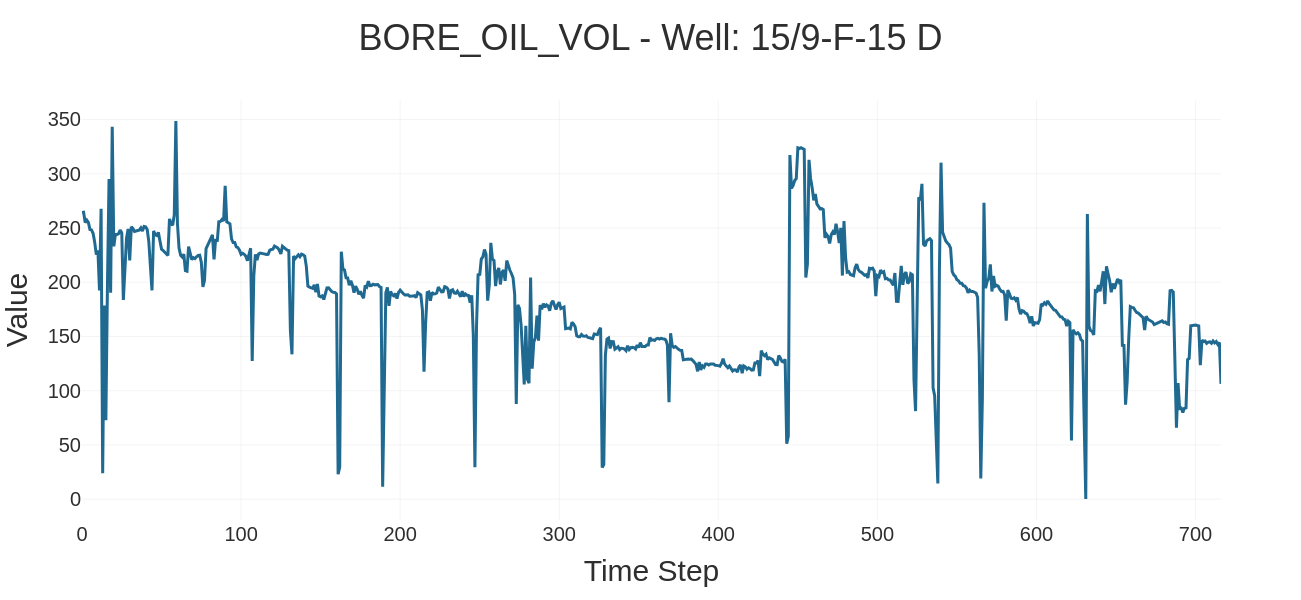

Pearson Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.978681
ON_STREAM_HRS               0.455259
AVG_DOWNHOLE_TEMPERATURE    0.443931
AVG_ANNULUS_PRESS           0.434292
AVG_WHP_P                   0.339951
DP_CHOKE_SIZE               0.320112
AVG_WHT_P                   0.271984
BORE_OIL_VOL_NO_ST          0.210751
AVG_DP_TUBING               0.210611
BORE_GAS_VOL_NO_ST          0.201358
BORE_WAT_VOL_NO_ST          0.145338
BORE_WAT_VOL                0.064842
AVG_DOWNHOLE_PRESSURE       0.041826
AVG_CHOKE_SIZE_P            0.010219
Name: BORE_OIL_VOL, dtype: float64

Spearman Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.976780
DP_CHOKE_SIZE               0.598219
AVG_WHP_P                   0.549217
AVG_DOWNHOLE_TEMPERATURE    0.469290
AVG_ANNULUS_PRESS           0.392381
AVG_DP_TUBING               0.309226
AVG_WHT_P                   0.285761
BORE_WAT_VOL                0.247443
ON_STREAM_HRS               0.242

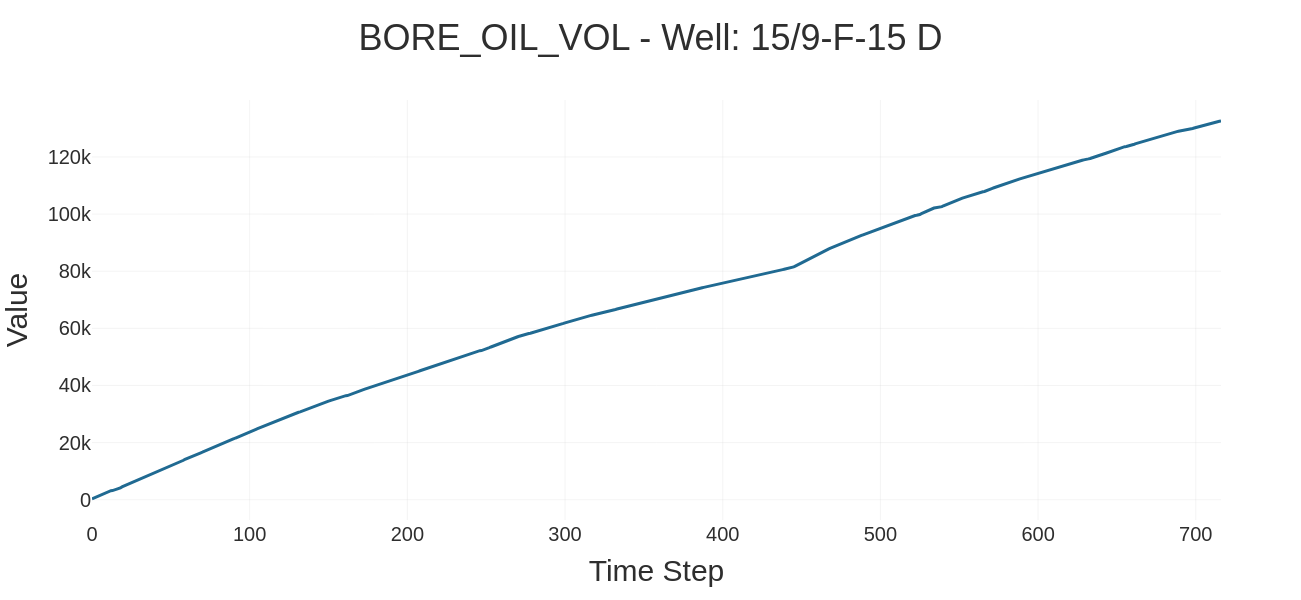

Col: AVG_DOWNHOLE_PRESSURE NaN: 6
Col: AVG_DOWNHOLE_PRESSURE InF: 0
Col: AVG_DOWNHOLE_TEMPERATURE NaN: 6
Col: AVG_DOWNHOLE_TEMPERATURE InF: 0
Col: AVG_ANNULUS_PRESS NaN: 467
Col: AVG_ANNULUS_PRESS InF: 0
Col: AVG_DP_TUBING NaN: 6
Col: AVG_DP_TUBING InF: 0
Col: AVG_DOWNHOLE_PRESSURE NaN: 0
Col: AVG_DOWNHOLE_PRESSURE InF: 0
Col: AVG_DOWNHOLE_TEMPERATURE NaN: 0
Col: AVG_DOWNHOLE_TEMPERATURE InF: 0
Col: AVG_ANNULUS_PRESS NaN: 0
Col: AVG_ANNULUS_PRESS InF: 0
Col: AVG_DP_TUBING NaN: 0
Col: AVG_DP_TUBING InF: 0


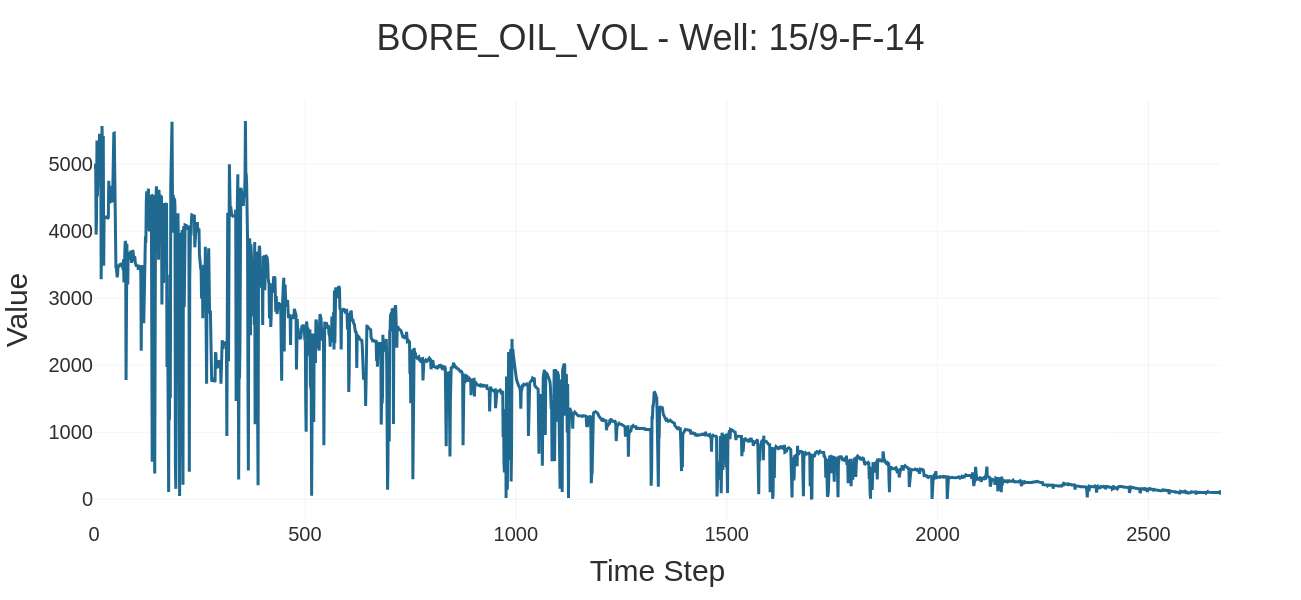

Pearson Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.998222
AVG_DP_TUBING               0.789156
AVG_WHP_P                   0.784541
DP_CHOKE_SIZE               0.752975
BORE_WAT_VOL                0.596588
AVG_CHOKE_SIZE_P            0.582329
AVG_ANNULUS_PRESS           0.442555
AVG_DOWNHOLE_PRESSURE       0.410720
AVG_WHT_P                   0.213559
AVG_DOWNHOLE_TEMPERATURE    0.197158
ON_STREAM_HRS               0.159846
BORE_GAS_VOL_NO_ST          0.089934
BORE_OIL_VOL_NO_ST          0.085398
BORE_WAT_VOL_NO_ST          0.064661
Name: BORE_OIL_VOL, dtype: float64

Spearman Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.998974
AVG_DP_TUBING               0.900910
AVG_WHP_P                   0.871622
AVG_DOWNHOLE_TEMPERATURE    0.864119
DP_CHOKE_SIZE               0.825746
AVG_DOWNHOLE_PRESSURE       0.746857
AVG_ANNULUS_PRESS           0.589685
AVG_CHOKE_SIZE_P            0.533090
BORE_WAT_VOL                0.310

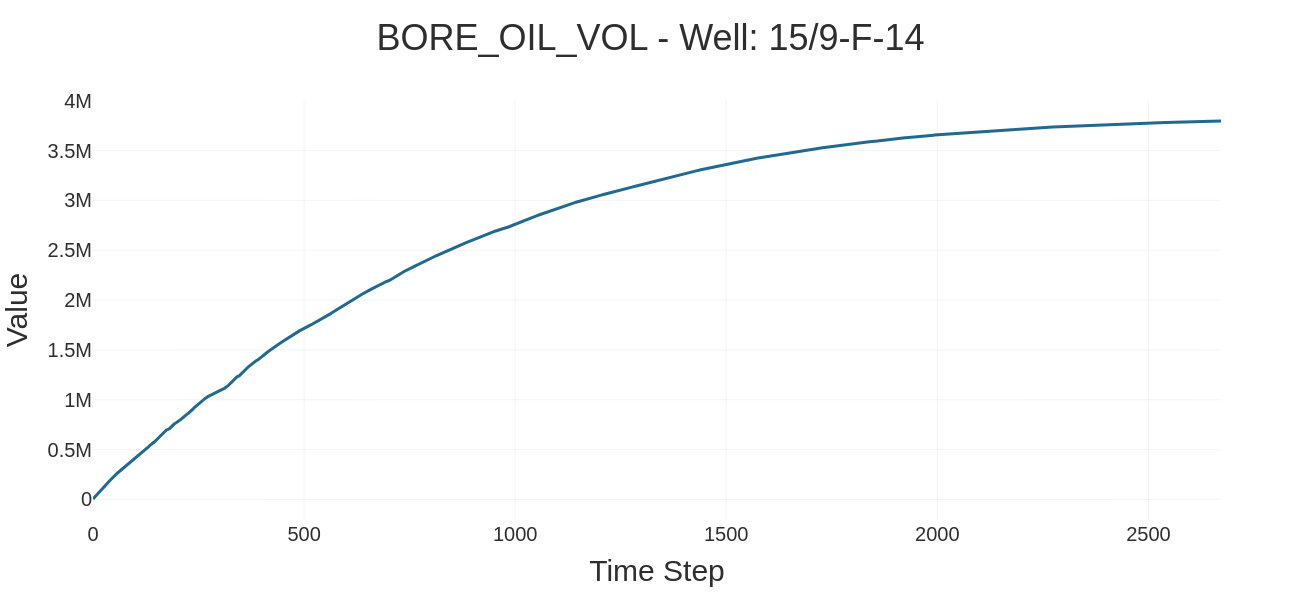

Col: AVG_DOWNHOLE_PRESSURE NaN: 6
Col: AVG_DOWNHOLE_PRESSURE InF: 0
Col: AVG_DOWNHOLE_TEMPERATURE NaN: 6
Col: AVG_DOWNHOLE_TEMPERATURE InF: 0
Col: AVG_ANNULUS_PRESS NaN: 13
Col: AVG_ANNULUS_PRESS InF: 0
Col: AVG_DP_TUBING NaN: 6
Col: AVG_DP_TUBING InF: 0
Col: AVG_DOWNHOLE_PRESSURE NaN: 0
Col: AVG_DOWNHOLE_PRESSURE InF: 0
Col: AVG_DOWNHOLE_TEMPERATURE NaN: 0
Col: AVG_DOWNHOLE_TEMPERATURE InF: 0
Col: AVG_ANNULUS_PRESS NaN: 0
Col: AVG_ANNULUS_PRESS InF: 0
Col: AVG_DP_TUBING NaN: 0
Col: AVG_DP_TUBING InF: 0


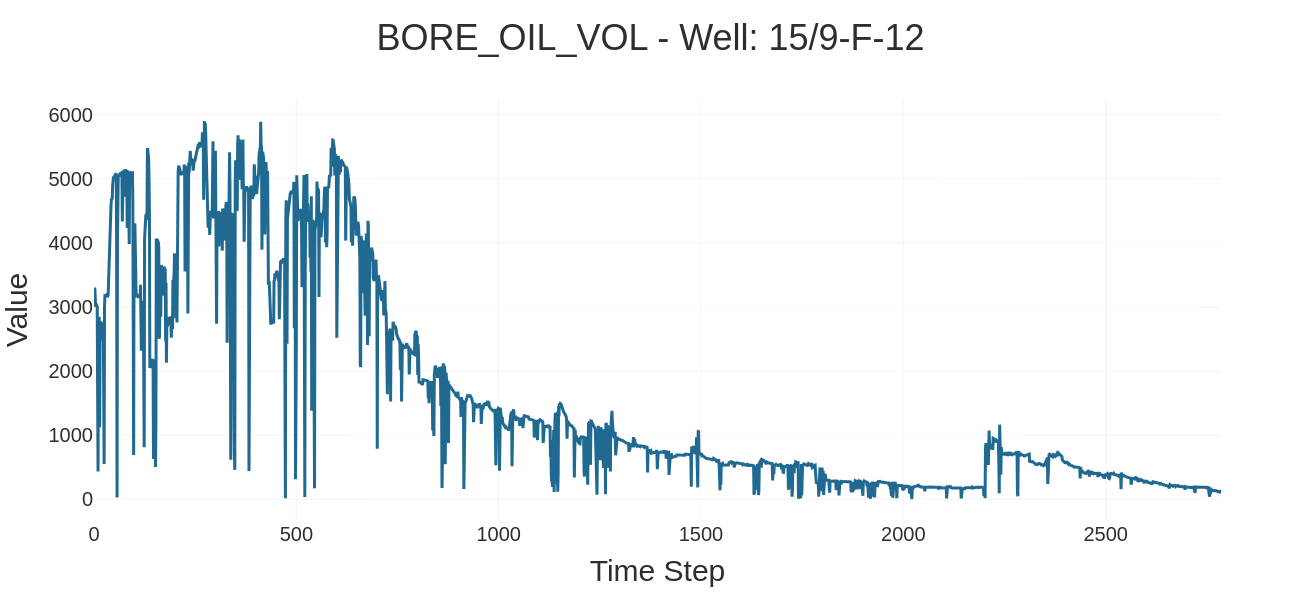

Pearson Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.998648
AVG_DOWNHOLE_TEMPERATURE    0.870863
AVG_DOWNHOLE_PRESSURE       0.849329
AVG_DP_TUBING               0.841805
AVG_WHP_P                   0.733811
DP_CHOKE_SIZE               0.694815
BORE_WAT_VOL                0.569521
AVG_CHOKE_SIZE_P            0.400253
AVG_WHT_P                   0.218668
ON_STREAM_HRS               0.161401
BORE_OIL_VOL_NO_ST          0.069348
BORE_GAS_VOL_NO_ST          0.065370
AVG_ANNULUS_PRESS           0.058515
BORE_WAT_VOL_NO_ST          0.042905
Name: BORE_OIL_VOL, dtype: float64

Spearman Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.997613
AVG_DP_TUBING               0.825290
AVG_WHP_P                   0.809102
DP_CHOKE_SIZE               0.794321
AVG_DOWNHOLE_TEMPERATURE    0.758008
AVG_DOWNHOLE_PRESSURE       0.735114
BORE_WAT_VOL                0.511812
AVG_CHOKE_SIZE_P            0.458680
AVG_WHT_P                   0.206

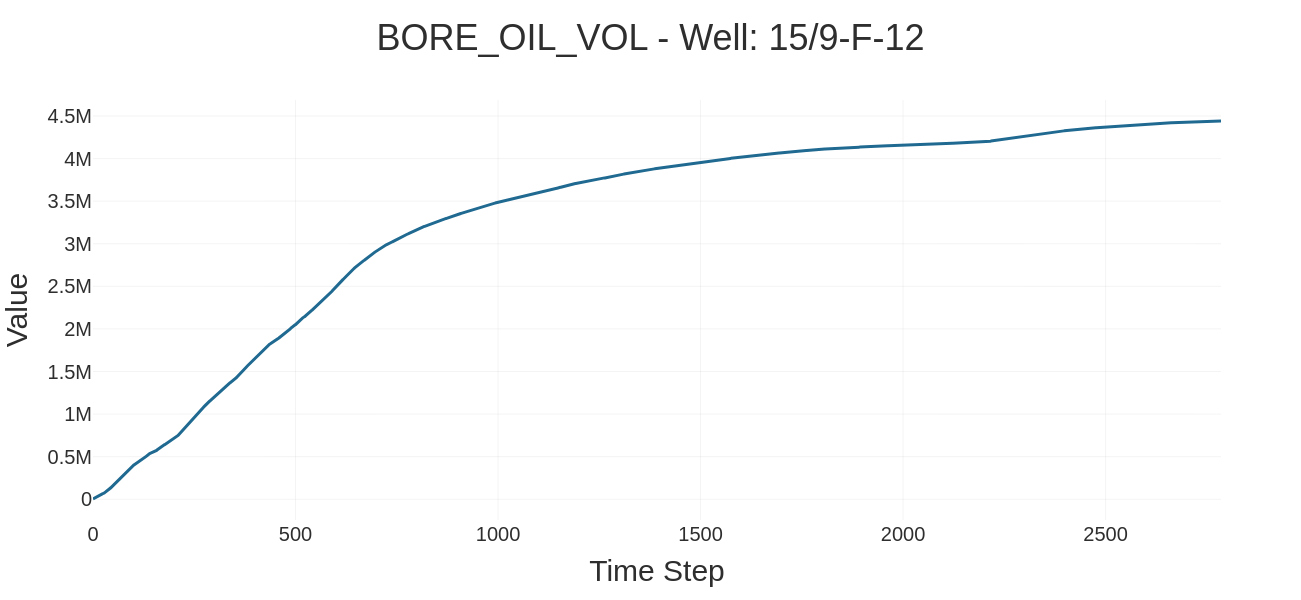

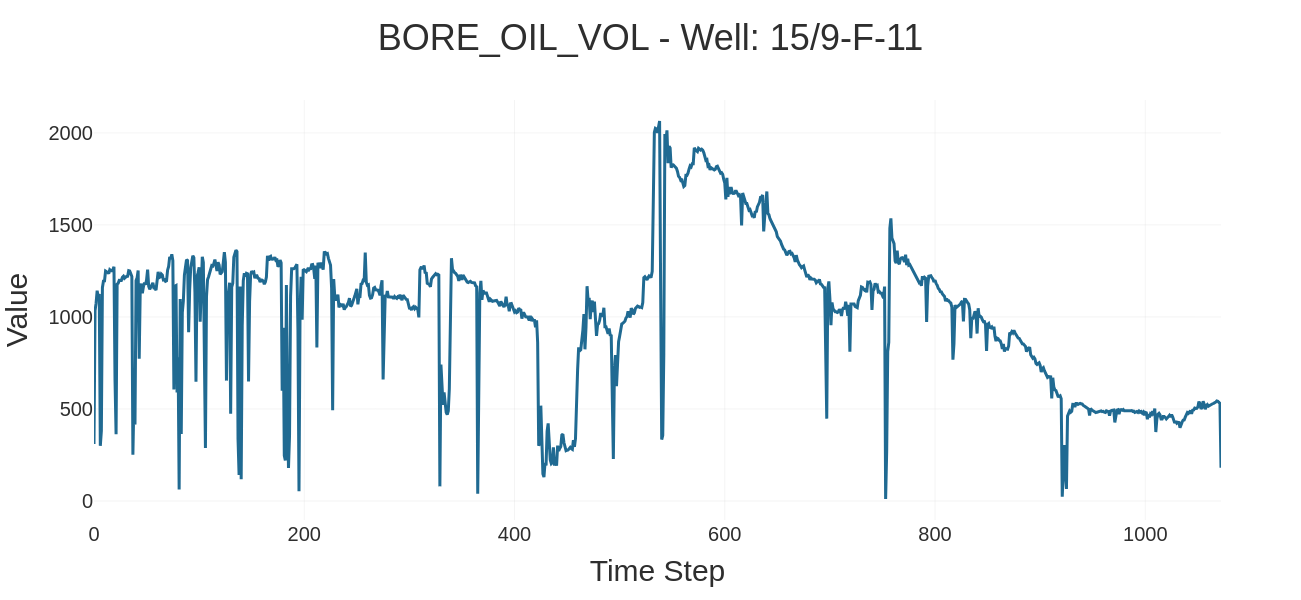

Pearson Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.994039
AVG_DP_TUBING               0.690336
AVG_DOWNHOLE_PRESSURE       0.636651
AVG_DOWNHOLE_TEMPERATURE    0.541341
AVG_CHOKE_SIZE_P            0.373742
ON_STREAM_HRS               0.370732
BORE_WAT_VOL                0.331172
AVG_WHP_P                   0.161208
BORE_GAS_VOL_NO_ST          0.139183
BORE_OIL_VOL_NO_ST          0.136866
DP_CHOKE_SIZE               0.122372
BORE_WAT_VOL_NO_ST          0.105901
AVG_ANNULUS_PRESS           0.099921
AVG_WHT_P                   0.098971
Name: BORE_OIL_VOL, dtype: float64

Spearman Correlation:
BORE_OIL_VOL                1.000000
BORE_GAS_VOL                0.989035
AVG_DP_TUBING               0.550177
AVG_DOWNHOLE_TEMPERATURE    0.502703
AVG_DOWNHOLE_PRESSURE       0.481672
ON_STREAM_HRS               0.331288
AVG_WHP_P                   0.304028
DP_CHOKE_SIZE               0.300663
BORE_WAT_VOL                0.223739
AVG_WHT_P                   0.162

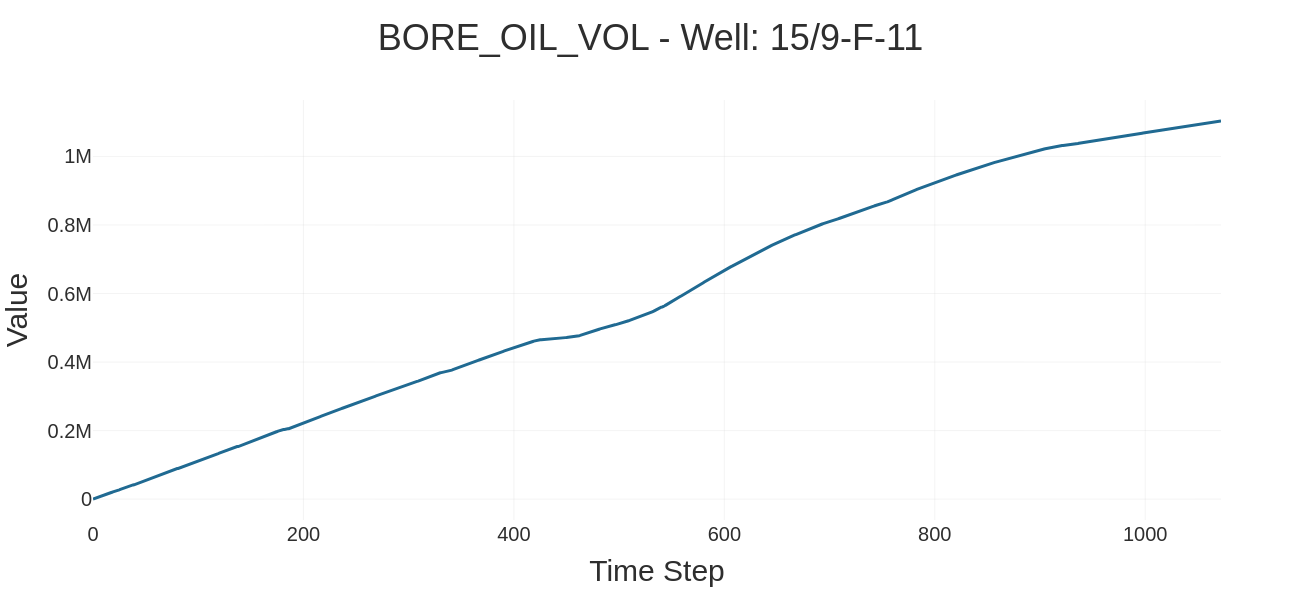

Length of X_train: 250
X_train shape: (250, 9)
y_train shape: (250,)
X_test shape: (1, 9)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
        Feature_0     Feature_1     Feature_2  Feature_3  Feature_4  \
248  1.361972e+08  1.369550e+08  1.377157e+08       24.0       24.0   
249  1.369550e+08  1.377157e+08  1.384820e+08       24.0       24.0   
250  1.377157e+08  1.384820e+08  1.392521e+08       24.0       24.0   
251  1.384820e+08  1.392521e+08  1.400294e+08       24.0       24.0   
252  1.392521e+08  1.400294e+08  1.408116e+08       24.0       24.0   

     Feature_5  Feature_6  Feature_7  Feature_8      Target  
248       24.0  926335.42  931575.23  936857.09  1219700.12  
249       24.0  931575.23  936857.09  942159.83  1223889.44  
250       24.0  936857.09  942159.83  947430.74  1228148.04  
251       24.0  942159.83  947430.74  952731.73  1232541.04  
252       24

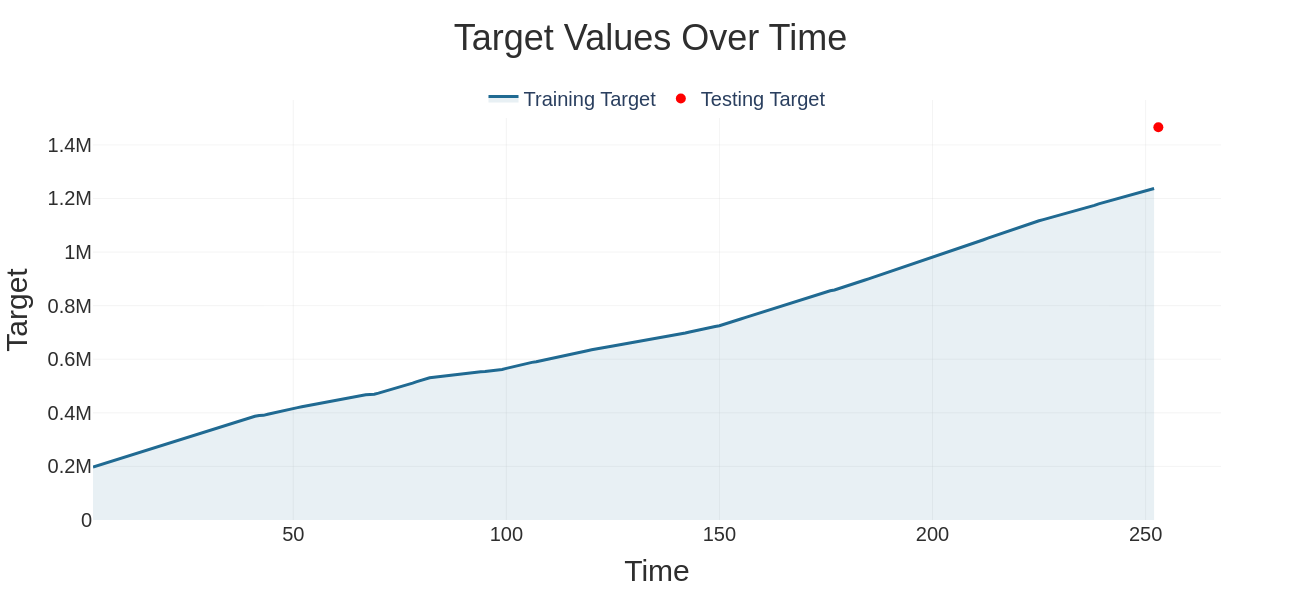

Length of X_train: 250
X_train shape: (250, 10)
y_train shape: (250,)
X_test shape: (1, 10)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
     Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
248   1.721357   1.725356   1.729355   0.292699   0.292699   0.292699   
249   1.740548   1.744613   1.748740   0.292699   0.292699   0.292699   
250   1.759817   1.764011   1.768221   0.292699   0.292699   0.292699   
251   1.779226   1.783504   1.787883   0.292699   0.292699   0.292699   
252   1.798731   1.803178   1.807670   0.292699   0.292699   0.292699   

     Feature_6  Feature_7  Feature_8  Feature_9    Target  
248   1.747201   1.750823   1.754521   1.750862  1.309268  
249   1.766711   1.770471   1.774225   1.770483  1.306368  
250   1.786378   1.790195   1.793812   1.790142  1.303560  
251   1.806122   1.809802   1.813510   1.809826  1.300916  
252   1.

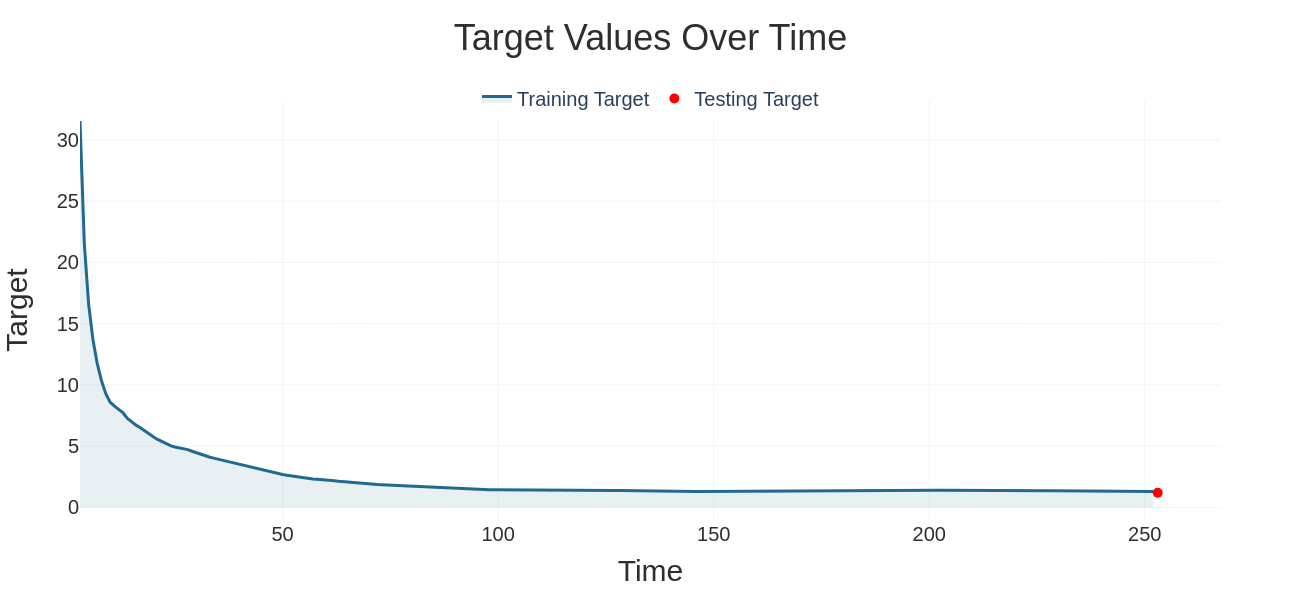

Length of X_train: 252
X_train shape: (252, 9)
y_train shape: (252,)
X_test shape: (1, 9)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
        Feature_0     Feature_1     Feature_2  Feature_3  Feature_4  \
250  1.347106e+08  1.352640e+08  1.358172e+08       24.0       24.0   
251  1.352640e+08  1.358172e+08  1.363394e+08       24.0       24.0   
252  1.358172e+08  1.363394e+08  1.368216e+08       24.0       24.0   
253  1.363394e+08  1.368216e+08  1.373020e+08       24.0       24.0   
254  1.368216e+08  1.373020e+08  1.377778e+08       24.0       24.0   

     Feature_5  Feature_6  Feature_7  Feature_8      Target  
250       24.0  949203.42  953231.95  957255.50  1100872.75  
251       24.0  953231.95  957255.50  960909.39  1103116.33  
252       24.0  957255.50  960909.39  964406.00  1105450.65  
253       24.0  960909.39  964406.00  967885.80  1107773.21  
254       24

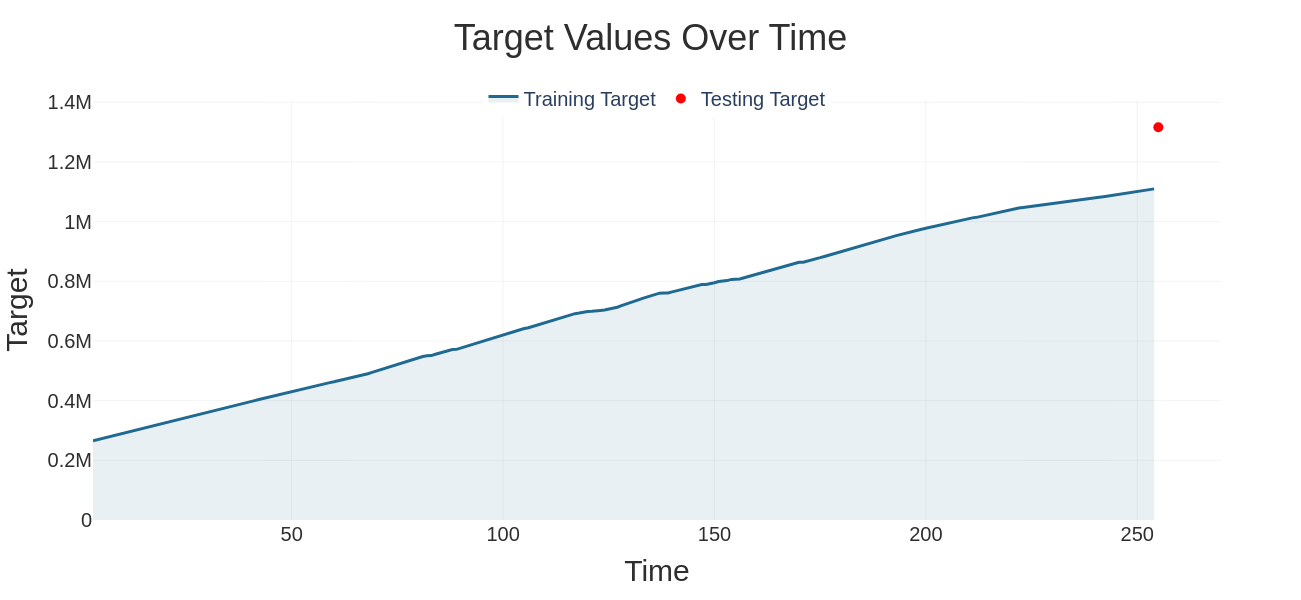

Length of X_train: 252
X_train shape: (252, 10)
y_train shape: (252,)
X_test shape: (1, 10)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
     Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
250   1.627809   1.630077   1.632337   0.313838   0.313838   0.313838   
251   1.642184   1.644466   1.645935   0.313838   0.313838   0.313838   
252   1.656555   1.658047   1.658490   0.313838   0.313838   0.313838   
253   1.670120   1.670588   1.671002   0.313838   0.313838   0.313838   
254   1.682646   1.683085   1.683390   0.313838   0.313838   0.313838   

     Feature_6  Feature_7  Feature_8  Feature_9    Target  
250   1.648880   1.651319   1.653732   1.651314  1.154886  
251   1.663794   1.666229   1.667286   1.665775  1.152522  
252   1.678690   1.679770   1.680257   1.679578  1.150484  
253   1.692217   1.692728   1.693165   1.692709  1.148665  
254   1.

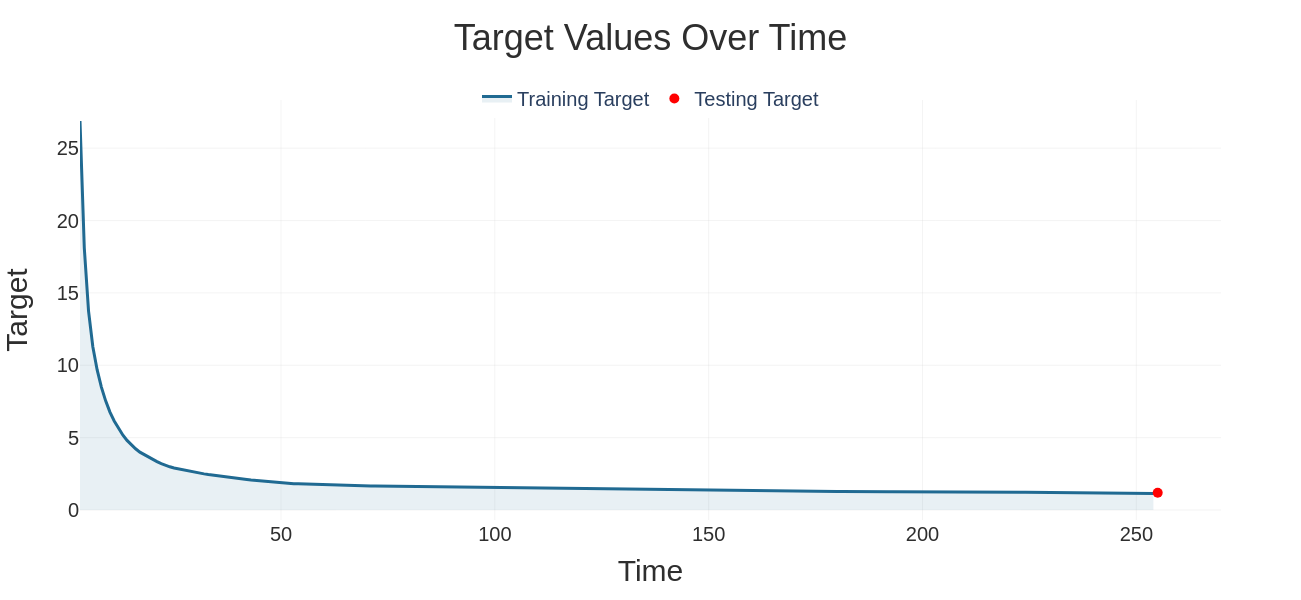

Length of X_train: 252
X_train shape: (252, 9)
y_train shape: (252,)
X_test shape: (1, 9)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
       Feature_0    Feature_1    Feature_2  Feature_3  Feature_4  Feature_5  \
250  41604603.60  41768799.67  41936465.67   24.00000   24.00000   24.00000   
251  41768799.67  41936465.67  42106815.36   24.00000   24.00000   24.00000   
252  41936465.67  42106815.36  42265398.28   24.00000   24.00000   21.66666   
253  42106815.36  42265398.28  42428052.44   24.00000   21.66666   24.00000   
254  42265398.28  42428052.44  42591743.82   21.66666   24.00000   24.00000   

     Feature_6  Feature_7  Feature_8     Target  
250  275780.10  276891.93  278026.92  340293.38  
251  276891.93  278026.92  279179.52  341345.70  
252  278026.92  279179.52  280247.76  342393.10  
253  279179.52  280247.76  281356.94  343433.26  
254  280247.76  281356.9

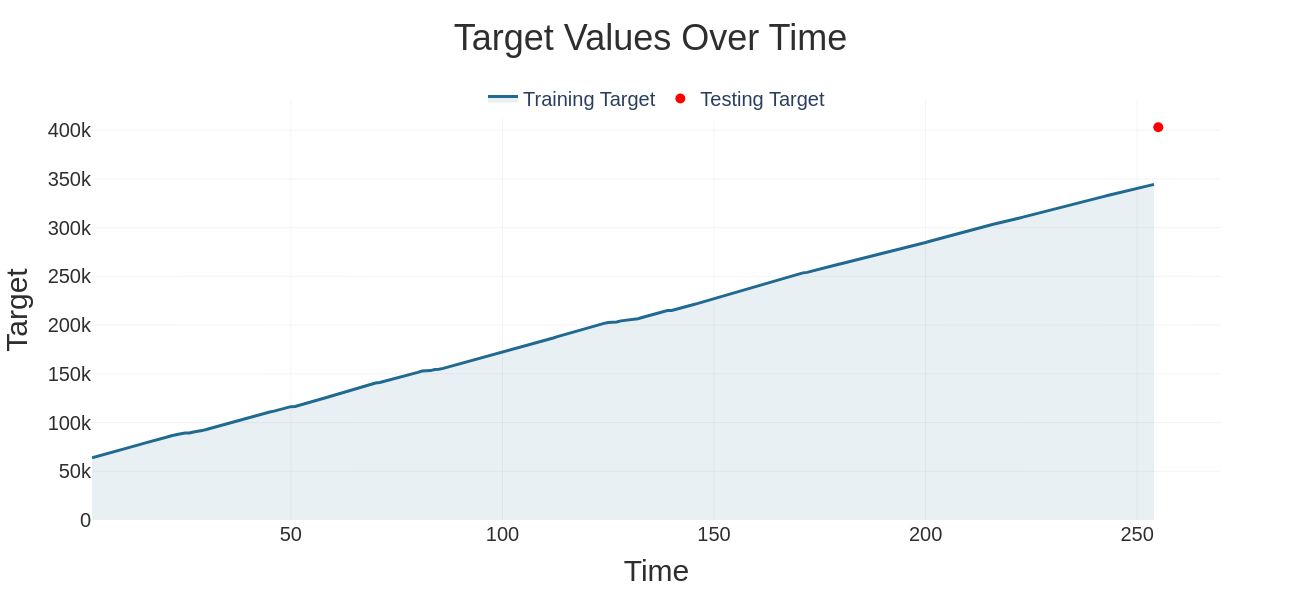

Length of X_train: 252
X_train shape: (252, 10)
y_train shape: (252,)
X_test shape: (1, 10)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
     Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
250   1.644467   1.644460   1.644746   0.378768   0.371889   0.371889   
251   1.657783   1.658061   1.658567   0.378768   0.371889   0.371889   
252   1.671381   1.671879   1.671433   0.378768   0.371889  -0.139245   
253   1.685197   1.684743   1.684630   0.378768  -0.139245   0.371889   
254   1.698058   1.697937   1.697911  -0.125106   0.371889   0.371889   

     Feature_6  Feature_7  Feature_8  Feature_9    Target  
250   1.672907   1.672671   1.672727   1.672773  1.228941  
251   1.686564   1.686610   1.686882   1.686691  1.227717  
252   1.700505   1.700767   1.700001   1.700429  1.226550  
253   1.714663   1.713887   1.713622   1.714062  1.225403  
254   1.

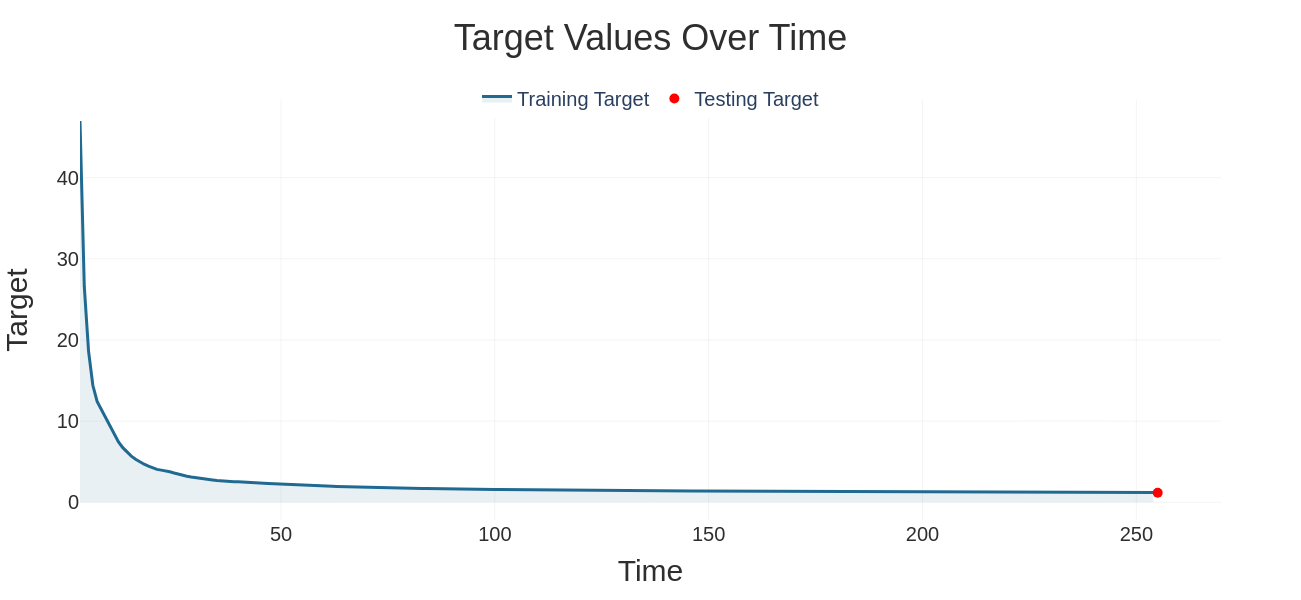

Length of X_train: 252
X_train shape: (252, 9)
y_train shape: (252,)
X_test shape: (1, 9)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
      Feature_0   Feature_1   Feature_2  Feature_3  Feature_4  Feature_5  \
250  7845374.73  7869307.38  7902984.58        9.5       24.0       24.0   
251  7869307.38  7902984.58  7933231.01       24.0       24.0       24.0   
252  7902984.58  7933231.01  7965566.35       24.0       24.0       24.0   
253  7933231.01  7965566.35  7998039.55       24.0       24.0       24.0   
254  7965566.35  7998039.55  8031717.64       24.0       24.0       24.0   

     Feature_6  Feature_7  Feature_8    Target  
250   52233.86   52393.04   52600.76  62761.32  
251   52393.04   52600.76   52807.18  62919.04  
252   52600.76   52807.18   53028.52  63076.02  
253   52807.18   53028.52   53251.93  63238.95  
254   53028.52   53251.93   53482.08  63400.47 

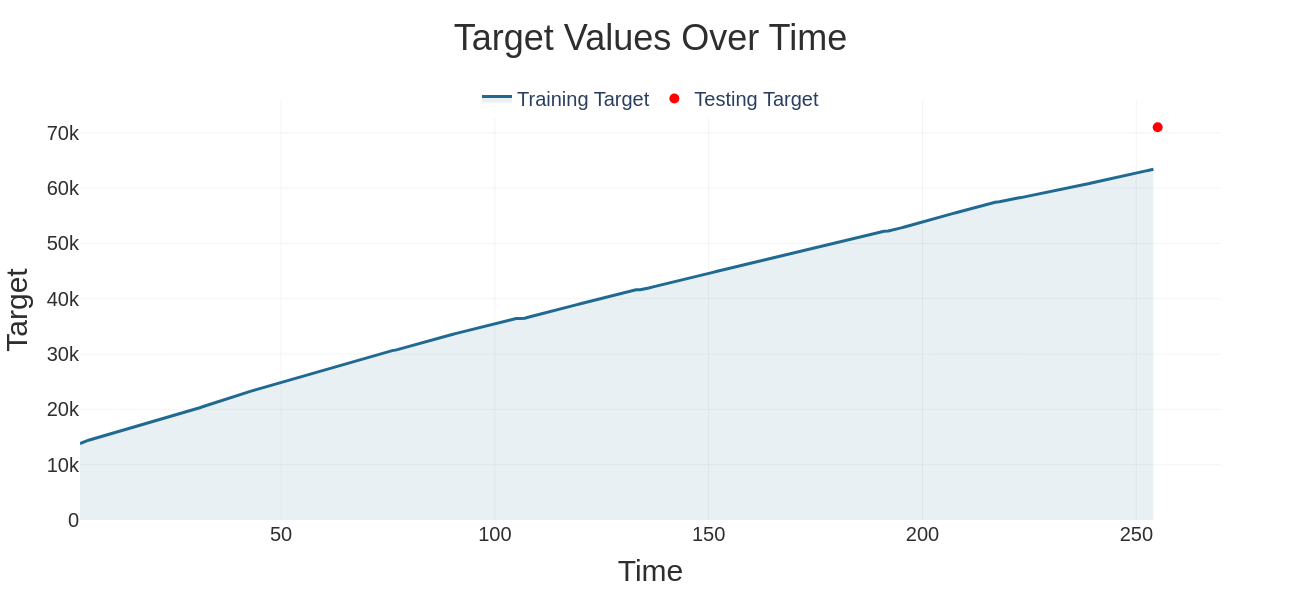

Length of X_train: 252
X_train shape: (252, 10)
y_train shape: (252,)
X_test shape: (1, 10)
y_test shape: (1,)

Descompasso entre os nomes gerados e o número de colunas. Ajustando os nomes das características.
Últimos exemplos dos dados de treinamento:
     Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
250   1.588009   1.586459   1.589111  -4.081365   0.253122   0.253122   
251   1.598407   1.601108   1.602282   0.253122   0.253122   0.253122   
252   1.613039   1.614264   1.616362   0.253122   0.253122   0.253122   
253   1.626181   1.628329   1.630503   0.253122   0.253122   0.253122   
254   1.640230   1.642454   1.645168   0.253122   0.253122   0.253122   

     Feature_6  Feature_7  Feature_8  Feature_9    Target  
250   1.561727   1.560518   1.562425   1.561559  1.197524  
251   1.572060   1.574021   1.575861   1.573981  1.196172  
252   1.585545   1.587439   1.590268   1.587751  1.194347  
253   1.598945   1.601827   1.604810   1.601860  1.192530  
254   1.

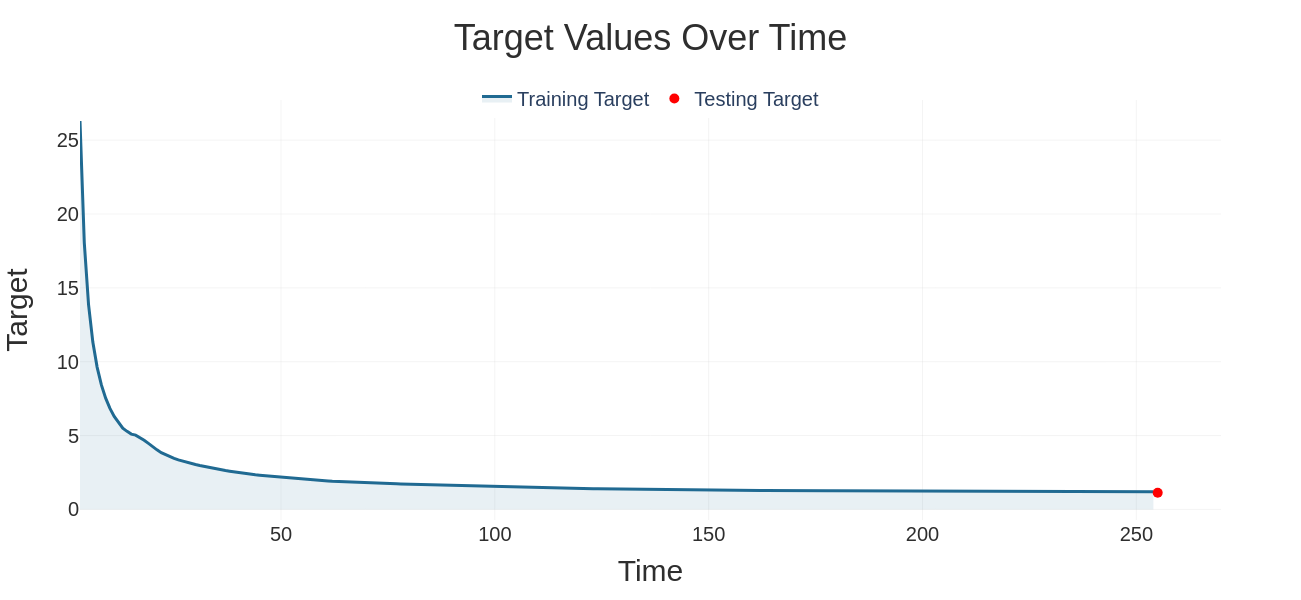

6 0
6 1
6 2
6 3
6 0
6 1
6 2
6 3
6 0
6 1
6 2
6 3
6 0
6 1
6 2
6 3
6 0
6 1
6 2
6 3
Not enough data for well 3 at iteration 409. Skipping.
No data left for well 15/9-F-15 D at iteration 409. Removing from active wells.
6 0
6 1
6 2
6 0
6 1
6 2
6 0
6 1
6 2
Not enough data for well 2 at iteration 765. Skipping.
No data left for well 15/9-F-11 at iteration 765. Removing from active wells.
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
6 0
6 1
Not enough data for well 1 at iteration 2365. Skipping.
No data left for well 15/9-F-14 at iteration 2365. Removing from active wells.
6 0
Not enough data for well 0 at iteration 2478. Skipping.
No data left for well 15/9-F-12 at iteration 2478. Removing from active wells.


In [3]:
import multiprocessing
import os
from typing import List
import math
import matplotlib. pyplot as plt

def train_and_evaluate_wells(
    forecast_steps: int,
    window_size: int,
    wells: List[str],
    series_name: str,
    data_path: str,
    model_type: str = 'DL',
    sample_time: int = 7,
    train_windows: int = None,
    fine_tuning_windows: int = None,
    model_path: str = 'VOLVE_MODELS/best_disruptive_model_VOLVE.keras'
) -> None:
    """
    Trains and evaluates the model for the specified wells using parallel processing.

    Parameters:
    - forecast_steps (int): Number of steps to forecast.
    - window_size (int): Size of the rolling window used in the model.
    - wells (List[str]): List of well names to be used in the analysis.
    - series_name (str): Name of the series to forecast (e.g., 'BORE_OIL_VOL').
    - data_path (str): Path to the CSV file containing the data.
    - model_type (str): Type of model to use ('DL' for Deep Learning or 'GBR' for Gradient Boosting Regressor).
    - sample_time (int): Sampling time interval, e.g., 7 days for weekly data.
    - train_windows (int): Number of windows used for training.
    - fine_tuning_windows (int): Number of windows used for fine-tuning the model.
    - model_path (str): Path to save or load the model.

    Returns:
    - None
    """

    # Process data for each well
    df_list = [
        process_well_data(series_name, well, window_size, data_path) for well in wells
    ]
    
    # Organizando wells e df_list
    wells, df_list = organize_wells_by_df_size(wells, df_list)

    # Calculate the total number of iterations based on the data
    total_iterations = calculate_total_iterations(df_list)

    # Initialize lists to store test and prediction results
    y_test_list, y_pred_list = initialize_prediction_lists(len(wells))

    # List of active wells (indices)
    active_wells = list(range(len(wells)))

    for control_iteration in range(total_iterations):
        # print(f"ITERATION: {control_iteration}")
        # Filter data for the current iteration
        sets = filter_data_for_iteration(
            df_list, window_size, series_name, forecast_steps,
            control_iteration, active_wells, train_windows, fine_tuning_windows
        )
        
        if model_type == 'DL' and control_iteration == 0:
            for idx, i in enumerate(active_wells):

                X_train_base, y_train_base, X_tests, y_tests, max_trains, scalers = prepare_train_test_sets(
                    sets, model_type, well_idx=i)

                well_model_path = f"{model_path}_{wells[i].replace('/', '_')}.keras"

                # model_base = train_and_evaluate_disruptive(
                #     X_train_base, y_train_base, model_path=well_model_path, fine_tune=False, well=i
                # )

                continue
        

        args_list = []
        wells_to_remove = []

        # Prepare arguments for parallel processing for each active well
        for idx, i in enumerate(active_wells):
            if idx >= len(sets) or sets[idx] is None:
                print(f"No data left for well {wells[i]} at iteration {control_iteration}. Removing from active wells.")
                wells_to_remove.append(i)
                continue
                
            if control_iteration % 100 == 0:
                sets_i = sets[idx]
                print(len(sets_i), idx)
            
#             X_tests_i = X_tests[idx]
#             y_tests_i = y_tests[idx]
#             scalers_i = scalers[idx]

#             # Prepare model path specific to the well
#             well_model_path = f"{model_path}_{wells[i].replace('/', '_')}.keras"

#             # Add arguments to the list
#             args_list.append((
#                 i, wells[i], sets_i, X_tests_i, y_tests_i, scalers_i, model_type, well_model_path
#             ))

        # Remove wells that have been exhausted
        active_wells = [i for i in active_wells if i not in wells_to_remove]
            
#         for i in active_wells:
#             # Extend the test and prediction lists for the corresponding well
#             y_test_list[i].append(math.sqrt(math.exp(control_iteration/500)))
#             y_pred_list[i].append(math.sqrt(0.98*math.exp(control_iteration/500)))

#         # print(f"ITERATION: {control_iteration}")
#         # Evaluate and plot the results if needed
#         evaluate_and_plot_if_needed(
#             control_iteration, y_test_list, y_pred_list, wells,
#             window_size, forecast_steps, series_name
#         )

if __name__ == '__main__':
    # Set the multiprocessing start method
    multiprocessing.set_start_method('spawn', force=True)

    # Define parameters for forecasting and data processing
    forecast_steps = 56  # Number of steps ahead to forecast
    window_size = 3       # Size of the rolling window used in the model
    wells = ['15/9-F-15 D', '15/9-F-14', '15/9-F-12', '15/9-F-11']  # List of well names
    series_name = 'BORE_OIL_VOL'  # Name of the series to forecast
    data_path = "data/volve/Volve_Equinor.csv"  # Path to the CSV data file

    # Calculate the number of windows for training and fine-tuning
    train_windows = 250
    fine_tuning_windows = 252

    sample_time = 7  # Sampling time interval

    # Define the global model path
    model_path = 'VOLVE_MODELS/best_disruptive_model_VOLVE.keras'

    # Delete all files in the specified folder (make sure this is safe to do)
    # delete_all_files_in_folder('VOLVE_MODELS')

    # Call the main function with the desired parameters
    train_and_evaluate_wells(
        forecast_steps=forecast_steps,
        window_size=window_size,
        wells=wells,
        series_name=series_name,
        data_path=data_path,
        model_type='DL',  # or 'GBR'
        sample_time=sample_time,
        train_windows=train_windows,
        fine_tuning_windows=fine_tuning_windows,
        model_path=model_path
    )

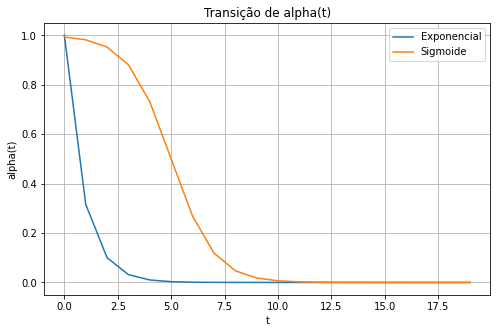

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que t varia de 0 a 20
t = np.arange(0, 20)

# Função exponencial
T = 10
k = -np.log(0.00001) / T
alpha_exponential = np.exp(-k * t)

# Função sigmoide
k_sigmoid = 1
alpha_sigmoid = 1 / (1 + np.exp(k_sigmoid * (t - T/2)))

# Plotando
plt.figure(figsize=(8, 5))
plt.plot(t, alpha_exponential, label='Exponencial')
plt.plot(t, alpha_sigmoid, label='Sigmoide')
plt.xlabel('t')
plt.ylabel('alpha(t)')
plt.title('Transição de alpha(t)')
plt.legend()
plt.grid(True)
plt.show()

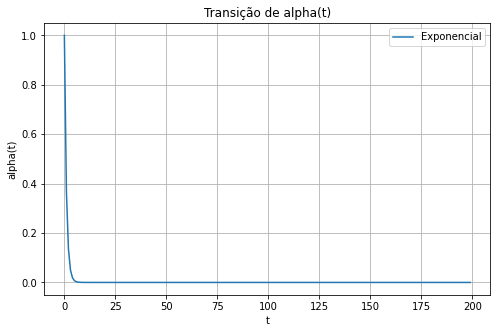

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que t varia de 0 a 20
t = np.arange(0, 200)

# Função exponencial
T = 1
k = 1 / T
alpha_exponential = np.exp(-t)

# Plotando
plt.figure(figsize=(8, 5))
plt.plot(t, alpha_exponential, label='Exponencial')
plt.xlabel('t')
plt.ylabel('alpha(t)')
plt.title('Transição de alpha(t)')
plt.legend()
plt.grid(True)
plt.show()

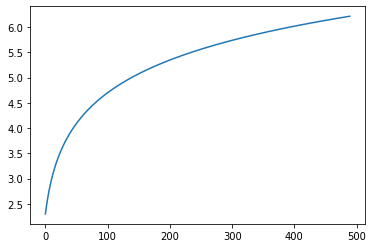

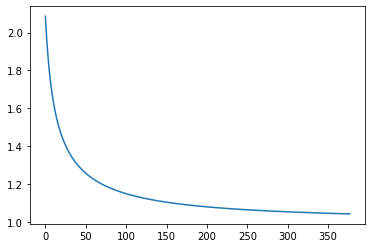

In [38]:
import math
y_test_list = []

for control_iteration in range(10, 500):

    # Extend the test and prediction lists for the corresponding well
    y_test_list.append(math.log(control_iteration))
    
plt.plot(y_test_list)
plt.show()


list_norm = []

for i in range(len(y_test_list)-112):
    future = y_test_list[i+112]
    past = y_test_list[i]
    value_norm = future/past
    
    list_norm.append(value_norm)
    
    
plt.plot(list_norm)
plt.show()

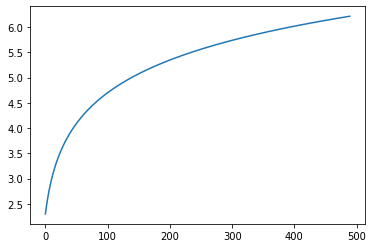

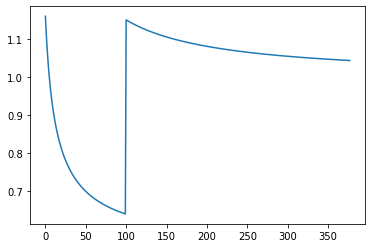

In [47]:
import math
import matplotlib.pyplot as plt

y_test_list = []

for control_iteration in range(10, 500):
    y_test_list.append(math.log(control_iteration))

plt.plot(y_test_list)
plt.show()

list_norm = []

# Definir o fator de aceleração e o limite de iterações
factor = 1.8  # Fator para acelerar a convergência
limite_iteracao = 100  # Número de iterações onde o fator será aplicado

for i in range(len(y_test_list) - 112):
    future = y_test_list[i + 112]
    past = y_test_list[i]
    value_norm = future / past

    # Aplica o fator de aceleração nas primeiras iterações
    if i < limite_iteracao:
        value_norm /= factor  # Acelera nas primeiras iterações
    list_norm.append(value_norm)

plt.plot(list_norm)
plt.show()

In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_time_series(df, series_name, well):
    """
    Plot a time series with an artistic and creative design using Plotly.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the time series data.
        series_name (str): Name of the time series.
        well (str): Well identifier.

    Returns:
        None
    """
    import numpy as np
    import plotly.graph_objects as go

    array = np.array(df).flatten()

    # Use the index as x-axis
    x = np.arange(len(array))

    # Create plot figure
    fig = go.Figure()

    # Add a filled line trace with a gradient effect
    fig.add_trace(go.Scatter(
        x=x,
        y=array,
        mode='lines',
        name=series_name,
        line=dict(color='#206A92', width=3),
    ))

    title = f"{series_name} - Well: {well}"

    # Update layout with artistic elements
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,
            font=dict(size=36, color='#2E2E2E')
        ),
        xaxis=dict(
            title="Time Step",
            title_font=dict(size=30, color='#2E2E2E'),
            tickfont=dict(size=20, color='#2E2E2E'),
            gridcolor='rgba(200,200,200,0.2)',
            zeroline=False
        ),
        yaxis=dict(
            title="Value",
            title_font=dict(size=30, color='#2E2E2E'),
            tickfont=dict(size=20, color='#2E2E2E'),
            gridcolor='rgba(200,200,200,0.2)',
            zeroline=False
        ),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='white',
        width=1200,
        height=600,
        showlegend=False
    )

    # Add custom hover information
    fig.update_traces(
        hovertemplate='<b>Time Step:</b> %{x}<br><b>Value:</b> %{y:.2f}'
    )


    # Show the figure
    fig.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

def treat_dataframe(df, columns):
    """
    Processes a DataFrame by selecting specific columns, counting NaNs and infinite values, 
    and imputing NaNs with column mean values.

    Args:
        df (pandas.DataFrame): The DataFrame to process.

    Returns:
        pandas.DataFrame: The processed DataFrame with NaN values imputed.
    """
    
    # Select specific columns
    df = df[columns]
    
    # Identify columns with NaN values
    cols_with_nans = [col for col in df.columns if df[col].isna().any()]

    # Function to count NaNs in a column
    def count_nans_per_col(df, col_name):
        return df[col_name].isna().sum()

    # Function to count infinite values in a column
    def count_infs_per_col(df, col_name):
        return np.isinf(df[col_name]).sum()

    # Print the count of NaNs and infinite values before imputation
    for col in cols_with_nans:
        print(f'Col: {col} NaN: {count_nans_per_col(df, col)}')
        print(f'Col: {col} InF: {count_infs_per_col(df, col)}')
    
    # Instantiate SimpleImputer with strategy to fill NaN values with mean
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer to your data and transform it
    df_imputed = imputer.fit_transform(df)

    # Transform the numpy array back into a DataFrame
    df = pd.DataFrame(df_imputed, columns=columns)
    
    # Print the count of NaNs and infinite values after imputation
    for col in cols_with_nans:
        print(f'Col: {col} NaN: {count_nans_per_col(df, col)}')
        print(f'Col: {col} InF: {count_infs_per_col(df, col)}')

    return df

In [12]:
def load_df_opsd(file_path):
    """
    Carrega dados do arquivo CSV.

    Parâmetros:
        file_path (str): O caminho para o arquivo CSV.

    Retorna:
        pd.DataFrame: O DataFrame carregado, ou None se o carregamento falhar.
    """
    import pandas as pd
    try:
        df = pd.read_csv(file_path, parse_dates=['utc_timestamp'], index_col='utc_timestamp')
        return df
    except Exception as e:
        print(f"Erro ao carregar os dados: {e}")
        return None

In [13]:
def preprocess_data(df):
    """
    Pré-processa o DataFrame para lidar com dados faltantes ou repetidos.

    Parâmetros:
        df (pd.DataFrame): O DataFrame a ser pré-processado.

    Retorna:
        pd.DataFrame: O DataFrame pré-processado.
    """
    # Remover índices duplicados
    df = df[~df.index.duplicated(keep='first')]
    # Preencher valores faltantes usando preenchimento para frente
    df = df.fillna(method='ffill')
    return df

In [81]:
def load_opsd(file_path, variable_choice, remove_zeros=False):
    """
    Executa o pipeline de processamento de dados e plota a variável selecionada.

    Parâmetros:
        file_path (str): O caminho relativo para o arquivo CSV.
        region_name (str): O nome da região para filtrar os dados.
        variable_choice (str): O nome em inglês da variável para plotar.
        remove_zeros (bool): Se deve remover linhas onde a variável selecionada é zero.

    Retorna:
        pd.DataFrame: O DataFrame processado e filtrado.

    Levanta:
        ValueError: Se a variável selecionada não for encontrada no mapeamento.
    """
    # Carregar dados do arquivo CSV
    df = load_df_opsd(file_path)
    if df is None:
        return

    # Pré-processar os dados para lidar com dados faltantes ou repetidos
    df = preprocess_data(df)
    filtered_df = df[::48]
    
    cumulative = f"Cumulative"

    # Opcionalmente remover linhas onde a variável selecionada é zero ou NaN
    if remove_zeros:
        filtered_df = filtered_df[filtered_df[variable_choice] != 0].dropna(subset=[variable_choice])

    # Plotar a variável selecionada ao longo do tempo
    plot_time_series(filtered_df[variable_choice], variable_choice, 'GB')

    if variable_choice in filtered_df.columns:
        filtered_df[cumulative] = filtered_df[variable_choice].cumsum()

    # Definir as colunas a serem mantidas para análise posterior
    columns_to_keep = [variable_choice, cumulative]
    
    filtered_df = treat_dataframe(filtered_df, columns_to_keep)

    # Reordenar as colunas para ter a variável selecionada no final
    filtered_df = filtered_df[[col for col in filtered_df.columns if col != cumulative] + [cumulative]]
    
    # Plotar a soma cumulativa
    plot_time_series(filtered_df[cumulative], cumulative, 'GB')

    return filtered_df


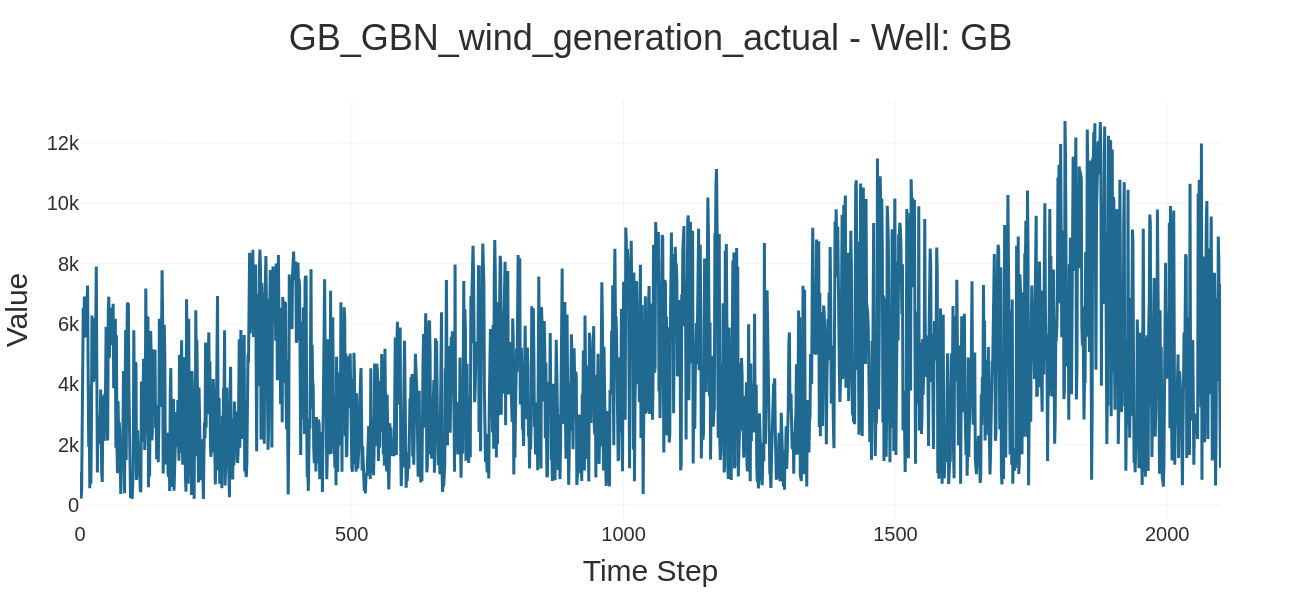

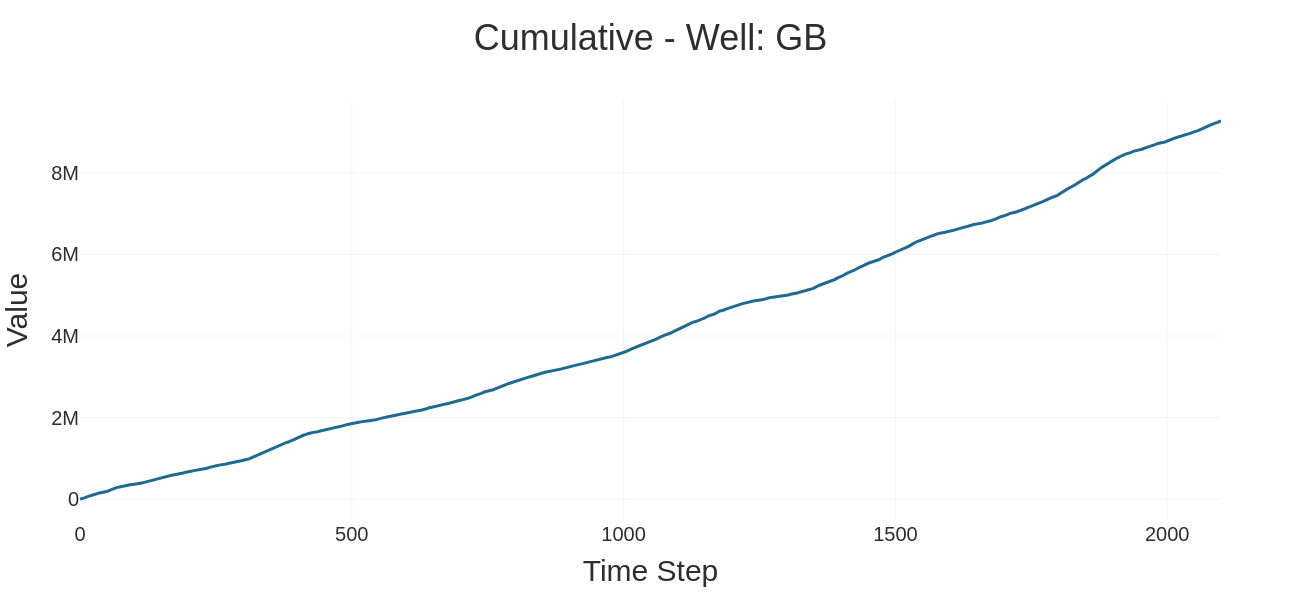

In [82]:
# Relative path to the data file
file_path = 'data/time_series_30min_singleindex.csv'

# Variable you want to analyze - wind or solar
choice = 'GB_GBN_wind_generation_actual'
# variable_choice = 'GB_GBN_solar_generation_actual'

# Load and process the data
processed_df = load_opsd(file_path, choice, remove_zeros=True)

In [83]:
processed_df

GB_GBN_wind_generation_actual    Cumulative
0                           1078.86  1.078860e+03
1                            700.81  1.779670e+03
2                            208.94  1.988610e+03
3                            422.43  2.411040e+03
4                           3929.00  6.340040e+03
...                             ...           ...
2095                        8102.40  9.258690e+06
2096                        5359.24  9.264049e+06
2097                        1773.38  9.265823e+06
2098                        1234.37  9.267057e+06
2099                        7331.79  9.274389e+06

[2100 rows x 2 columns]